In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester()

Simulating 947 stocks
Unable to determine minima and maxima for the following tickers:
[]
Simulating now with 947 stocks
tickers= ['SRCE', 'ABBV', 'ARAY', 'ACRS', 'ACOR', 'AYI', 'ADUS', 'IOTS', 'ADRO', 'AAP', 'ADSW', 'WMS', 'AGLE', 'ACY', 'AVAV', 'ARPO', 'AES', 'AMG', 'AGCO', 'AGRX', 'AEM', 'ALRN', 'AIRG', 'AIRT', 'AKRX', 'ALK', 'AA', 'AXU', 'ALXN', 'AQN', 'ALCO', 'ALGN', 'ALLK', 'ABTX', 'LNT', 'ALSN', 'ALL', 'APT', 'ALPN', 'AMRK', 'AEP', 'AFG', 'AMNB', 'ANAT', 'AMRB', 'AMS', 'AMT', 'AMWD', 'CRMT', 'AMP', 'ATLO', 'AMGN', 'FOLD', 'AP', 'AMPH', 'AMPY', 'PLAN', 'ATRS', 'AR', 'APEN', 'APTX', 'APYX', 'AROC', 'ARCT', 'ACRE', 'AGX', 'ARGO', 'AHH', 'ARMP', 'AWI', 'ARWR', 'ARTW', 'AKG', 'AINC', 'ASH', 'ASPN', 'ASMB', 'ASRT', 'AGO', 'ASTE', 'ALOT', 'AAME', 'AUB', 'ATRC', 'ATRI', 'ACB', 'ADP', 'AZO', 'AVB', 'AGR', 'AVY', 'AVID', 'AVA', 'AVX', 'AWRE', 'AXGT', 'BW', 'BTN', 'BANC', 'TBBK', 'BAC', 'BOCH', 'BMO', 'BNS', 'BPRN', 'BHB', 'BRN', 'BSET', 'BTE', 'BCBP', 'BDC', 'BHLB', 'BBY', 'BASI', 'BCRX',

after buy: invested in ['CVGI', 'CRK'] (2
capital=10000 in_use=4000.0 free=6000.0
*** buying 2000.0 in CHNR on 2017-03-17 00:00:00 with target sell date of 2017-06-08 00:00:00
enough money (6000.0) to buy CHNR (capital=10000
invested in: ['CVGI', 'CRK'] (2
after buy: invested in ['CVGI', 'CRK', 'CHNR'] (3
capital=10000 in_use=6000.0 free=4000.0
*** buying 2000.0 in NATR on 2017-03-17 00:00:00 with target sell date of 2017-05-22 00:00:00
enough money (4000.0) to buy NATR (capital=10000
invested in: ['CVGI', 'CRK', 'CHNR'] (3
after buy: invested in ['CVGI', 'CRK', 'CHNR', 'NATR'] (4
capital=10000 in_use=8000.0 free=2000.0
*** buying 2000.0 in IONS on 2017-03-17 00:00:00 with target sell date of 2017-04-21 00:00:00
enough money (2000.0) to buy IONS (capital=10000
invested in: ['CVGI', 'CRK', 'CHNR', 'NATR'] (4
after buy: invested in ['CVGI', 'CRK', 'CHNR', 'NATR', 'IONS'] (5
capital=10000 in_use=10000.0 free=0.0
*** buying 2000.0 in MG on 2017-03-17 00:00:00 with target sell date of 2017-

after buy: invested in ['CRK', 'CHNR', 'CBPO', 'CCI', 'ISNS'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in BRT on 2017-03-17 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: BRT is not expected to perform better than stocks already invested in
invested in: ['CRK', 'CHNR', 'CBPO', 'CCI', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CRK', 'CHNR', 'CBPO', 'CCI', 'ISNS'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in TBBK on 2017-03-17 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['CRK', 'CHNR', 'CBPO', 'CCI', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CRK', 'CHNR', 'CBPO', 'CCI', 'ISNS'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in JBHT on 2017-03-17 00:00:00 with target sell date of 2017-07-06 0

after buy: invested in ['CHNR', 'ISNS', 'PTSI', 'SYX', 'OFLX'] (5
capital=10057.063468150967 in_use=9977.859339351255 free=79.20412879971309
*** buying 2011.4126936301934 in ZIOP on 2017-03-20 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['CHNR', 'ISNS', 'PTSI', 'SYX', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CHNR', 'ISNS', 'PTSI', 'SYX', 'OFLX'] (5
capital=10057.063468150967 in_use=9977.859339351255 free=79.20412879971309
*** buying 2011.4126936301934 in ACB on 2017-03-20 00:00:00 with target sell date of 2017-03-29 00:00:00
maxed out: ACB is not expected to perform better than stocks already invested in
invested in: ['CHNR', 'ISNS', 'PTSI', 'SYX', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CHNR', 'ISNS', 'PTSI', 'SYX', 'OFLX'] (5
capital=10057.063468150967 in_use=9977.859339351255 free=79.20412879971309
*** buyin

after buy: invested in ['ISNS', 'PTSI', 'SYX', 'OFLX', 'TGT'] (5
capital=9967.589496547147 in_use=9883.462620397186 free=84.12687614995912
*** buying 1993.5178993094294 in SGRP on 2017-03-21 00:00:00 with target sell date of 2017-03-29 00:00:00
maxed out: SGRP is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'PTSI', 'SYX', 'OFLX', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'PTSI', 'SYX', 'OFLX', 'TGT'] (5
capital=9967.589496547147 in_use=9883.462620397186 free=84.12687614995912
*** buying 1993.5178993094294 in LUV on 2017-03-21 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: LUV is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'PTSI', 'SYX', 'OFLX', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'PTSI', 'SYX', 'OFLX', 'TGT'] (5
capital=9967.589496547147 in_use=9883.462620397186 free=84.12687614995912
*** buying 1993.5

after buy: invested in ['ISNS', 'SYX', 'OFLX', 'TGT', 'DXCM'] (5
capital=9643.597142458586 in_use=9620.373602846317 free=23.223539612265085
*** buying 1928.7194284917173 in HROW on 2017-03-23 00:00:00 with target sell date of 2017-03-24 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'SYX', 'OFLX', 'TGT', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'SYX', 'OFLX', 'TGT', 'DXCM'] (5
capital=9643.597142458586 in_use=9620.373602846317 free=23.223539612265085
*** buying 1928.7194284917173 in HBMD on 2017-03-23 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'SYX', 'OFLX', 'TGT', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'SYX', 'OFLX', 'TGT', 'DXCM'] (5
capital=9643.597142458586 in_use=9620.373602846317 free=23.223539612265085
*** buying 1

after buy: invested in ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5
capital=9599.523775001402 in_use=9599.523775001398 free=0.0
*** buying 1919.9047550002804 in AGCO on 2017-03-24 00:00:00 with target sell date of 2017-03-27 00:00:00
maxed out: AGCO is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5
capital=9599.523775001402 in_use=9599.523775001398 free=0.0
*** buying 1919.9047550002804 in BTE on 2017-03-24 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'TECH'] (5
capital=9599.523775001402 in_use=9599.523775001398 free=0.0
before day_close: 2017-03-24 00:00:00 5 9599.523775001402 9

after buy: invested in ['SYX', 'OFLX', 'TGT', 'DXCM', 'ZN'] (5
capital=10394.163540994557 in_use=10394.163540994554 free=0.0
*** buying 2078.8327081989114 in BOOM on 2017-03-28 00:00:00 with target sell date of 2017-04-21 00:00:00
maxed out: BOOM is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'ZN'] (5
capital=10394.163540994557 in_use=10394.163540994554 free=0.0
*** buying 2078.8327081989114 in PRIM on 2017-03-28 00:00:00 with target sell date of 2017-04-07 00:00:00
maxed out: PRIM is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'DXCM', 'ZN'] (5
capital=10394.163540994557 in_use=10394.163540994554 free=0.0
*** buying 2078.8327081989114 in CBU on 2017-03-28 00:00:00 w

after buy: invested in ['SYX', 'OFLX', 'TGT', 'ZN', 'PKBK'] (5
capital=10910.195365514826 in_use=10910.195365514823 free=0.0
*** buying 2182.039073102965 in VRTS on 2017-03-30 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: VRTS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PKBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PKBK'] (5
capital=10910.195365514826 in_use=10910.195365514823 free=0.0
*** buying 2182.039073102965 in ADUS on 2017-03-30 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PKBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PKBK'] (5
capital=10910.195365514826 in_use=10910.195365514823 free=0.0
*** buying 2182.039073102965 in SPOK on 2017-03-30 00:00:00 wit

after buy: invested in ['SYX', 'OFLX', 'TGT', 'ZN', 'PODD'] (5
capital=10978.16042776603 in_use=10978.160427766026 free=0.0
*** buying 2195.632085553206 in HWC on 2017-04-04 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PODD'] (5
capital=10978.16042776603 in_use=10978.160427766026 free=0.0
*** buying 2195.632085553206 in XRAY on 2017-04-04 00:00:00 with target sell date of 2017-04-06 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OFLX', 'TGT', 'ZN', 'PODD'] (5
capital=10978.16042776603 in_use=10978.160427766026 free=0.0
*** buying 2195.632085553206 in BXP on 2017-04-04 00:00:00 with targ

after buy: invested in ['OFLX', 'TGT', 'ZN', 'SKYW', 'ISSC'] (5
capital=11050.519878479263 in_use=10162.400129329784 free=888.1197491494759
*** buying 2210.1039756958526 in ALCO on 2017-04-07 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'ISSC'] (5
capital=11050.519878479263 in_use=10162.400129329784 free=888.1197491494759
*** buying 2210.1039756958526 in HWKN on 2017-04-07 00:00:00 with target sell date of 2017-05-01 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'ISSC'] (5
capital=11050.519878479263 in_use=10162.400129329784 free=888.1197491494759
*** buying 221

after buy: invested in ['OFLX', 'TGT', 'ZN', 'SKYW', 'TRNS'] (5
capital=10881.878616147871 in_use=10033.097306078318 free=848.7813100695512
*** buying 2176.3757232295743 in BHB on 2017-04-13 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'TRNS'] (5
capital=10881.878616147871 in_use=10033.097306078318 free=848.7813100695512
*** buying 2176.3757232295743 in CASS on 2017-04-13 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'SKYW', 'TRNS'] (5
capital=10881.878616147871 in_use=10033.097306078318 free=848.7813100695512
*** buying 2176.

after buy: invested in ['OFLX', 'TGT', 'ZN', 'TRNS', 'AIRT'] (5
capital=11002.814756193977 in_use=10215.441153151714 free=787.3736030422606

before day_close: 2017-04-17 00:00:00 5 11002.814756193977 10215.441153151714 787.3736030422606 1.8189894035458565e-12 True
after day_close: 2017-04-17 00:00:00 5 11014.86458503017 10227.490981987907 787.3736030422606 1.8189894035458565e-12 True
*** buying 2202.9729170060336 in VIAV on 2017-04-18 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: VIAV is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'AIRT'] (5
capital=11014.86458503017 in_use=10227.490981987907 free=787.3736030422606
*** buying 2202.9729170060336 in HON on 2017-04-18 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
inves

after buy: invested in ['OFLX', 'TGT', 'ZN', 'TRNS', 'NVDA'] (5
capital=11162.757140957452 in_use=10172.234332940609 free=990.5228080168422
*** buying 2232.5514281914902 in BDSI on 2017-04-20 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'NVDA'] (5
capital=11162.757140957452 in_use=10172.234332940609 free=990.5228080168422
*** buying 2232.5514281914902 in CHE on 2017-04-20 00:00:00 with target sell date of 2017-04-28 00:00:00
maxed out: CHE is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ZN', 'TRNS', 'NVDA'] (5
capital=11162.757140957452 in_use=10172.234332940609 free=990.5228080168422
*** buying 2232.

after buy: invested in ['TGT', 'ZN', 'TRNS', 'NVDA', 'BIIB'] (5
capital=11921.714153107932 in_use=10868.988706335678 free=1052.7254467722505
*** buying 2384.3428306215865 in ESCA on 2017-05-01 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ZN', 'TRNS', 'NVDA', 'BIIB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ZN', 'TRNS', 'NVDA', 'BIIB'] (5
capital=11921.714153107932 in_use=10868.988706335678 free=1052.7254467722505
*** buying 2384.3428306215865 in CVLT on 2017-05-01 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ZN', 'TRNS', 'NVDA', 'BIIB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ZN', 'TRNS', 'NVDA', 'BIIB'] (5
capital=11921.714153107932 in_use=10868.988706335678 free=1052.7254467722505
*** buying 

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'PEBK', 'GFN'] (5
capital=12203.437323314785 in_use=11350.347939680772 free=853.0893836340074
*** buying 2440.687464662957 in TGNA on 2017-05-02 00:00:00 with target sell date of 2017-06-19 00:00:00
*** selling GFN on 2017-05-02 00:00:00 to free up money for TGNA
profit of selling GFN on 2017-05-02 00:00:00:  0.0 0.0%
enough money (3293.7768482969645) to buy TGNA (capital=12203.437323314785
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK'] (4
after buy: invested in ['TGT', 'TRNS', 'NVDA', 'PEBK', 'TGNA'] (5
capital=12203.437323314785 in_use=11350.347939680772 free=853.0893836340074
*** buying 2440.687464662957 in FCN on 2017-05-02 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FCN is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'TGNA'] (5
capital=12203.4373233

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'PEBK', 'PW'] (5
capital=12258.990094735278 in_use=11363.486901972563 free=895.5031927627115
*** buying 2451.7980189470554 in FOLD on 2017-05-05 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'PW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'PW'] (5
capital=12258.990094735278 in_use=11363.486901972563 free=895.5031927627115
*** buying 2451.7980189470554 in GRIF on 2017-05-05 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'PW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'PEBK', 'PW'] (5
capital=12258.990094735278 in_use=11363.486901972563 free=895.5031927627115
*** buying 245

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'MSEX', 'NSSC'] (5
capital=12413.271362386902 in_use=11496.106043558673 free=917.1653188282239

before day_close: 2017-05-09 00:00:00 5 12413.271362386902 11496.106043558673 917.1653188282239 5.002220859751105e-12 True
after day_close: 2017-05-09 00:00:00 5 12380.265092260392 11463.099773432163 917.1653188282239 5.002220859751105e-12 True
*** buying 2476.0530184520785 in SEB on 2017-05-10 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'MSEX', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'MSEX', 'NSSC'] (5
capital=12380.265092260392 in_use=11463.099773432163 free=917.1653188282239
*** buying 2476.0530184520785 in IONS on 2017-05-10 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'CORT', 'ATRS'] (5
capital=12562.284215510776 in_use=12096.145655706103 free=466.1385598046677
*** buying 2512.4568431021553 in PKOH on 2017-05-18 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: PKOH is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'CORT', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'CORT', 'ATRS'] (5
capital=12562.284215510776 in_use=12096.145655706103 free=466.1385598046677
*** buying 2512.4568431021553 in BANC on 2017-05-18 00:00:00 with target sell date of 2017-06-15 00:00:00
maxed out: BANC is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'CORT', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'CORT', 'ATRS'] (5
capital=12562.284215510776 in_use=12096.145655706103 free=466.1385598046677
*** 

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'ATRS', 'EXAS'] (5
capital=13068.165986561371 in_use=12432.116607715367 free=636.0493788459999
*** buying 2613.633197312274 in SFST on 2017-05-30 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: SFST is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'ATRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'ATRS', 'EXAS'] (5
capital=13068.165986561371 in_use=12432.116607715367 free=636.0493788459999
*** buying 2613.633197312274 in JOE on 2017-05-30 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: JOE is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'ATRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'ATRS', 'EXAS'] (5
capital=13068.165986561371 in_use=12432.116607715367 free=636.0493788459999
*** buyi

after buy: invested in ['TRNS', 'NVDA', 'ATRS', 'TIPT', 'STRL'] (5
capital=13725.238139678975 in_use=13493.296400759864 free=231.94173891910623
*** buying 2745.047627935795 in CASS on 2017-06-05 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'ATRS', 'TIPT', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'ATRS', 'TIPT', 'STRL'] (5
capital=13725.238139678975 in_use=13493.296400759864 free=231.94173891910623
*** buying 2745.047627935795 in CVI on 2017-06-05 00:00:00 with target sell date of 2017-06-27 00:00:00
*** selling TIPT on 2017-06-05 00:00:00 to free up money for CVI
profit of selling TIPT on 2017-06-05 00:00:00:  70.16603630020336 2.62%
enough money (2982.4503618870785) to buy CVI (capital=13570.872859818528
invested in: ['TRNS', 'NVDA', 'ATRS', 'STRL'] (4
after buy: invested in ['TRNS', 'NVDA', 'ATRS', 'STRL', 'CVI'] (

after buy: invested in ['TRNS', 'NVDA', 'ATRS', 'STRL', 'DXCM'] (5
capital=13743.812901988977 in_use=13486.26954666609 free=257.5433553228836

before day_close: 2017-06-08 00:00:00 5 13743.812901988977 13486.26954666609 257.5433553228836 3.183231456205249e-12 True
after day_close: 2017-06-08 00:00:00 5 13998.37105086229 13740.827695539403 257.5433553228836 3.183231456205249e-12 True
*** buying 2799.674210172458 in VSH on 2017-06-09 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'ATRS', 'STRL', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'ATRS', 'STRL', 'DXCM'] (5
capital=13998.37105086229 in_use=13740.827695539403 free=257.5433553228836
*** buying 2799.674210172458 in SGRP on 2017-06-09 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: SGRP is not expected to perform better than stocks already invested in
in

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5
capital=14217.626033070708 in_use=14019.230333090789 free=198.39569997991475
*** buying 2843.5252066141416 in LNN on 2017-06-14 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5
capital=14217.626033070708 in_use=14019.230333090789 free=198.39569997991475
*** buying 2843.5252066141416 in IPAR on 2017-06-14 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: IPAR is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5
capital=14217.626033070708 in_use=14019.230333090789 free=198.3956999799147

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TGT'] (5
capital=14457.560598998727 in_use=14138.791017795971 free=318.7695812027514
*** buying 2891.5121197997455 in FLNT on 2017-06-19 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: FLNT is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TGT'] (5
capital=14457.560598998727 in_use=14138.791017795971 free=318.7695812027514
*** buying 2891.5121197997455 in OKE on 2017-06-19 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TGT'] (5
capital=14457.560598998727 in_use=14138.791017795971 free=318.7695812027514
*** bu

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'TGT', 'ITT'] (5
capital=14985.149841995926 in_use=14542.732665215293 free=442.4171767806297
*** buying 2997.0299683991852 in CATC on 2017-06-23 00:00:00 with target sell date of 2017-08-10 00:00:00
maxed out: CATC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'TGT', 'ITT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'TGT', 'ITT'] (5
capital=14985.149841995926 in_use=14542.732665215293 free=442.4171767806297
*** buying 2997.0299683991852 in TIPT on 2017-06-23 00:00:00 with target sell date of 2017-06-30 00:00:00
*** selling ITT on 2017-06-23 00:00:00 to free up money for TIPT
profit of selling ITT on 2017-06-23 00:00:00:  0.0 0.0%
enough money (3439.447145179815) to buy TIPT (capital=14985.149841995926
invested in: ['TRNS', 'NVDA', 'DXCM', 'TGT'] (4
after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'TGT', 'TIPT'] (5
capital=14985.149841

after buy: invested in ['TRNS', 'DXCM', 'TGT', 'DSGX', 'PLPC'] (5
capital=14953.798239671323 in_use=14047.765984436628 free=906.0322552346947
*** buying 2990.7596479342646 in SEB on 2017-06-27 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'DSGX', 'PLPC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'DSGX', 'PLPC'] (5
capital=14953.798239671323 in_use=14047.765984436628 free=906.0322552346947
*** buying 2990.7596479342646 in KLIC on 2017-06-27 00:00:00 with target sell date of 2017-08-01 00:00:00
*** selling PLPC on 2017-06-27 00:00:00 to free up money for KLIC
profit of selling PLPC on 2017-06-27 00:00:00:  4.547473508864641e-13 0.0%
enough money (3899.4931998815237) to buy KLIC (capital=14953.798239671323
invested in: ['TRNS', 'DXCM', 'TGT', 'DSGX'] (4
after buy: invested in ['TRNS', 'DXCM', 'TGT', 'DSGX', 'KLIC'] (

after day_close: 2017-06-27 00:00:00 5 14799.646073621283 13971.716493778938 827.929579842345 4.547473508864641e-13 True
invested in: ['TRNS', 'DXCM', 'TGT', 'KLIC', 'EXAS'] (5
capital=14799.646073621283 in_use=13971.716493778938 free=827.929579842345
*** selling EXAS on 2017-06-28 00:00:00
profit of selling EXAS on 2017-06-28 00:00:00:  220.20553582619505 7.36%
after selling invested in: ['TRNS', 'DXCM', 'TGT', 'KLIC'] (4
capital=15019.851609447478 in_use=10980.956845844674 free=4038.8947636028047
*** buying 3003.9703218894956 in ICFI on 2017-06-28 00:00:00 with target sell date of 2017-11-17 00:00:00
enough money (4038.8947636028047) to buy ICFI (capital=15019.851609447478
invested in: ['TRNS', 'DXCM', 'TGT', 'KLIC'] (4
after buy: invested in ['TRNS', 'DXCM', 'TGT', 'KLIC', 'ICFI'] (5
capital=15019.851609447478 in_use=13984.92716773417 free=1034.924441713309
*** buying 3003.9703218894956 in PRO on 2017-06-28 00:00:00 with target sell date of 2017-07-12 00:00:00
maxed out: PRO is not 

after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CCMP', 'NSIT'] (5
capital=14991.378685325435 in_use=14023.850937228708 free=967.5277480967297

before day_close: 2017-06-29 00:00:00 5 14991.378685325435 14023.850937228708 967.5277480967297 2.7284841053187847e-12 True
after day_close: 2017-06-29 00:00:00 5 14914.84725283447 13947.319504737743 967.5277480967297 2.7284841053187847e-12 True
*** buying 2982.969450566894 in VIAV on 2017-06-30 00:00:00 with target sell date of 2017-07-25 00:00:00
*** selling NSIT on 2017-06-30 00:00:00 to free up money for VIAV
profit of selling NSIT on 2017-06-30 00:00:00:  -15.662634447354776 -0.52%
enough money (3950.140850714462) to buy VIAV (capital=14899.184618387115
invested in: ['TRNS', 'DXCM', 'TGT', 'CCMP'] (4
after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CCMP', 'VIAV'] (5
capital=14899.184618387115 in_use=13932.01321823955 free=967.171400147568
*** buying 2979.836923677423 in NAV on 2017-06-30 00:00:00 with target sell date of 2017-07-13 00:00:00


after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CCMP', 'CTHR'] (5
capital=14984.869385108246 in_use=13930.853681652683 free=1054.015703455569
*** buying 2996.973877021649 in WMS on 2017-07-10 00:00:00 with target sell date of 2017-07-11 00:00:00
maxed out: WMS is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'CCMP', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'CCMP', 'CTHR'] (5
capital=14984.869385108246 in_use=13930.853681652683 free=1054.015703455569
*** buying 2996.973877021649 in CNOB on 2017-07-10 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'CCMP', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'CCMP', 'CTHR'] (5
capital=14984.869385108246 in_use=13930.853681652683 free=1054.015703455569
*** buyi

after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CTHR', 'MCRI'] (5
capital=15165.269636453406 in_use=13992.643871089942 free=1172.6257653634689
*** buying 3033.0539272906813 in ITIC on 2017-07-17 00:00:00 with target sell date of 2017-10-16 00:00:00
*** selling MCRI on 2017-07-17 00:00:00 to free up money for ITIC
profit of selling MCRI on 2017-07-17 00:00:00:  0.0 0.0%
enough money (4205.67969265415) to buy ITIC (capital=15165.269636453406
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR'] (4
after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CTHR', 'ITIC'] (5
capital=15165.269636453406 in_use=13992.643871089942 free=1172.6257653634689
*** buying 3033.0539272906813 in LBAI on 2017-07-17 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'ITIC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'ITIC'] (5
capital=15165.

after buy: invested in ['TRNS', 'DXCM', 'TGT', 'CTHR', 'PTSI'] (5
capital=15183.182929219338 in_use=13948.868931268289 free=1234.3139979510547
*** buying 3036.6365858438676 in AUB on 2017-07-19 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: AUB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'PTSI'] (5
capital=15183.182929219338 in_use=13948.868931268289 free=1234.3139979510547
*** buying 3036.6365858438676 in WNEB on 2017-07-19 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: WNEB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'CTHR', 'PTSI'] (5
capital=15183.182929219338 in_use=13948.868931268289 free=1234.3139979510547
***

after buy: invested in ['TRNS', 'DXCM', 'TGT', 'SYX', 'NOA'] (5
capital=15347.631553401665 in_use=14202.616085850255 free=1145.015467551415
*** buying 3069.526310680333 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'SYX', 'NOA'] (5
capital=15347.631553401665 in_use=14202.616085850255 free=1145.015467551415
*** buying 3069.526310680333 in MSCI on 2017-07-26 00:00:00 with target sell date of 2017-07-31 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'TGT', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'TGT', 'SYX', 'NOA'] (5
capital=15347.631553401665 in_use=14202.616085850255 free=1145.015467551415
*** buying 3069.

after buy: invested in ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=15344.77259954582 in_use=14922.659276323353 free=422.1133232224729
*** buying 3068.954519909164 in WCN on 2017-07-31 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: WCN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=15344.77259954582 in_use=14922.659276323353 free=422.1133232224729
*** buying 3068.954519909164 in PKOH on 2017-07-31 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: PKOH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'SYX', 'NOA', 'UNT'] (5
capital=15344.77259954582 in_use=14922.659276323353 free=422.1133232224729
*** buying 3068.9545199091

after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'HTZ'] (5
capital=16731.250830934234 in_use=16435.4478159737 free=295.8030149605388
*** buying 3346.250166186847 in IMMR on 2017-08-04 00:00:00 with target sell date of 2017-10-30 00:00:00
*** selling HTZ on 2017-08-04 00:00:00 to free up money for IMMR
profit of selling HTZ on 2017-08-04 00:00:00:  0.0 0.0%
enough money (3642.0531811473857) to buy IMMR (capital=16731.250830934234
invested in: ['DXCM', 'SYX', 'NOA', 'UNT'] (4
after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5
capital=16731.250830934234 in_use=16435.4478159737 free=295.8030149605388
*** buying 3346.250166186847 in MEOH on 2017-08-04 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'IMMR'] (5
capital=16731.250830934234 in_use

after buy: invested in ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=16014.371142675709 in_use=15626.518132462123 free=387.8530102135883
*** buying 3202.874228535142 in CBSH on 2017-08-10 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: CBSH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=16014.371142675709 in_use=15626.518132462123 free=387.8530102135883
*** buying 3202.874228535142 in FFBC on 2017-08-10 00:00:00 with target sell date of 2017-09-25 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'NOA', 'UNT', 'CCMP'] (5
capital=16014.371142675709 in_use=15626.518132462123 free=387.8530102135883
*** buying 3202.

after buy: invested in ['DXCM', 'SYX', 'UNT', 'CCMP', 'NVDA'] (5
capital=15678.034280035685 in_use=15678.034280035685 free=0.0
*** buying 3135.606856007137 in PEBO on 2017-08-11 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: PEBO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'CCMP', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'CCMP', 'NVDA'] (5
capital=15678.034280035685 in_use=15678.034280035685 free=0.0
*** buying 3135.606856007137 in CASS on 2017-08-11 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'CCMP', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'CCMP', 'NVDA'] (5
capital=15678.034280035685 in_use=15678.034280035685 free=0.0
*** buying 3135.606856007137 in BRT on 2017-08-11 00:

after buy: invested in ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=16248.500640137941 in_use=16226.32715155563 free=22.17348858231253
*** buying 3249.700128027588 in FMBI on 2017-08-15 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: FMBI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=16248.500640137941 in_use=16226.32715155563 free=22.17348858231253
*** buying 3249.700128027588 in FOLD on 2017-08-15 00:00:00 with target sell date of 2017-09-14 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'UNT', 'NVDA', 'TRNS'] (5
capital=16248.500640137941 in_use=16226.32715155563 free=22.17348858231253
*** buying 324

after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'HBMD', 'RGS'] (5
capital=15941.151790580981 in_use=15771.48731011319 free=169.66448046779033
*** buying 3188.2303581161964 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (3357.8948385839867) to buy HOFT (capital=15941.151790580981
invested in: ['DXCM', 'NVDA', 'TRNS', 'HBMD'] (4
after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'HBMD', 'HOFT'] (5
capital=15941.151790580981 in_use=15771.48731011319 free=169.66448046779033
*** buying 3188.2303581161964 in CNQ on 2017-08-17 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: CNQ is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'HBMD', 'HOFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'HBMD', 'HOFT'] (5
capital=15941.

after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'AMGN', 'AMP'] (5
capital=15988.882908662812 in_use=15648.07512511173 free=340.8077835510808
*** buying 3197.7765817325626 in FARM on 2017-08-18 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'AMGN', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'AMGN', 'AMP'] (5
capital=15988.882908662812 in_use=15648.07512511173 free=340.8077835510808
*** buying 3197.7765817325626 in CUBE on 2017-08-18 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: CUBE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'AMGN', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'AMGN', 'AMP'] (5
capital=15988.882908662812 in_use=15648.07512511173 free=340.8077835510808
*** buy

after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'LULU', 'SKYW'] (5
capital=15987.6839158434 in_use=15708.099389112018 free=279.58452673138163
*** buying 3197.53678316868 in WIRE on 2017-08-22 00:00:00 with target sell date of 2017-09-19 00:00:00
maxed out: WIRE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'LULU', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'LULU', 'SKYW'] (5
capital=15987.6839158434 in_use=15708.099389112018 free=279.58452673138163
*** buying 3197.53678316868 in AVID on 2017-08-22 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: AVID is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'LULU', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'LULU', 'SKYW'] (5
capital=15987.6839158434 in_use=15708.099389112018 free=279.58452673138163
*** bu

after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'SKYW', 'AIRT'] (5
capital=16092.242268254386 in_use=15716.816783575336 free=375.42548467904953
*** buying 3218.448453650877 in UNF on 2017-08-25 00:00:00 with target sell date of 2017-09-13 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'SKYW', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'SKYW', 'AIRT'] (5
capital=16092.242268254386 in_use=15716.816783575336 free=375.42548467904953
*** buying 3218.448453650877 in STAR on 2017-08-25 00:00:00 with target sell date of 2017-09-27 00:00:00
maxed out: STAR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'SKYW', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'SKYW', 'AIRT'] (5
capital=16092.242268254386 in_use=15716.816783575336 free=375.42548467904953


after buy: invested in ['DXCM', 'NVDA', 'TRNS', 'AIRT', 'OFLX'] (5
capital=16613.254687317127 in_use=16261.60673325602 free=351.6479540611008
*** buying 3322.650937463425 in TGNA on 2017-08-31 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: TGNA is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'AIRT', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'AIRT', 'OFLX'] (5
capital=16613.254687317127 in_use=16261.60673325602 free=351.6479540611008
*** buying 3322.650937463425 in CAG on 2017-08-31 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: CAG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'NVDA', 'TRNS', 'AIRT', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'NVDA', 'TRNS', 'AIRT', 'OFLX'] (5
capital=16613.254687317127 in_use=16261.60673325602 free=351.6479540611008
*** bu

after buy: invested in ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PACW'] (5
capital=16404.48450643749 in_use=15957.628002625475 free=446.85650381200094
*** buying 3280.8969012874977 in CVGI on 2017-09-11 00:00:00 with target sell date of 2017-10-17 00:00:00
*** selling PACW on 2017-09-11 00:00:00 to free up money for CVGI
profit of selling PACW on 2017-09-11 00:00:00:  0.0 0.0%
enough money (3727.7534050994987) to buy CVGI (capital=16404.48450643749
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX'] (4
after buy: invested in ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'CVGI'] (5
capital=16404.48450643749 in_use=15957.628002625475 free=446.85650381200094
*** buying 3280.8969012874977 in RRD on 2017-09-11 00:00:00 with target sell date of 2017-09-20 00:00:00
*** selling CVGI on 2017-09-11 00:00:00 to free up money for RRD
profit of selling CVGI on 2017-09-11 00:00:00:  0.0 0.0%
enough money (3727.7534050994987) to buy RRD (capital=16404.48450643749
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX'] (4
after buy: inve

after buy: invested in ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PCRX'] (5
capital=16955.107000688975 in_use=16537.53478792818 free=417.57221276077644
*** buying 3391.021400137795 in UMPQ on 2017-09-14 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PCRX'] (5
capital=16955.107000688975 in_use=16537.53478792818 free=417.57221276077644
*** buying 3391.021400137795 in CPB on 2017-09-14 00:00:00 with target sell date of 2017-11-14 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TRNS', 'AIRT', 'OFLX', 'PCRX'] (5
capital=16955.107000688975 in_use=16537.53478792818 free=417.57221276077644
***

after buy: invested in ['DXCM', 'TRNS', 'OFLX', 'LULU', 'ZN'] (5
capital=17138.655677119976 in_use=16850.668550922906 free=287.98712619705066

before day_close: 2017-09-19 00:00:00 5 17138.655677119976 16850.668550922906 287.98712619705066 1.864464138634503e-11 True
after day_close: 2017-09-19 00:00:00 5 17143.753056977777 16855.765930780708 287.98712619705066 1.864464138634503e-11 True
*** buying 3428.7506113955556 in ISNS on 2017-09-20 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling LULU on 2017-09-20 00:00:00 to free up money for ISNS
profit of selling LULU on 2017-09-20 00:00:00:  -68.43466282370173 -2.01%
enough money (3627.5986719937005) to buy ISNS (capital=17121.511791560075
invested in: ['DXCM', 'TRNS', 'OFLX', 'ZN'] (4
after buy: invested in ['DXCM', 'TRNS', 'OFLX', 'ZN', 'ISNS'] (5
capital=17121.511791560075 in_use=16922.66373096191 free=198.8480605981449
*** buying 3424.302358312015 in PRSC on 2017-09-20 00:00:00 with target sell date of 2017-10-05 00:00:0

after buy: invested in ['DXCM', 'TRNS', 'ZN', 'ISNS', 'PODD'] (5
capital=16791.704914813625 in_use=16095.470816997884 free=696.2340978157285
*** buying 3358.340982962725 in IDXX on 2017-09-26 00:00:00 with target sell date of 2017-10-02 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TRNS', 'ZN', 'ISNS', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TRNS', 'ZN', 'ISNS', 'PODD'] (5
capital=16791.704914813625 in_use=16095.470816997884 free=696.2340978157285
*** buying 3358.340982962725 in RSG on 2017-09-26 00:00:00 with target sell date of 2017-09-27 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TRNS', 'ZN', 'ISNS', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TRNS', 'ZN', 'ISNS', 'PODD'] (5
capital=16791.704914813625 in_use=16095.470816997884 free=696.2340978157285
*** buying 33

after buy: invested in ['TRNS', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=15984.342168437479 in_use=15984.342168437468 free=0.0
*** buying 3196.868433687496 in MDU on 2017-09-29 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=15984.342168437479 in_use=15984.342168437468 free=0.0
*** buying 3196.868433687496 in AAME on 2017-09-29 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'ZN', 'ISNS', 'CTHR', 'DSGX'] (5
capital=15984.342168437479 in_use=15984.342168437468 free=0.0
*** buying 3196.868433687496 in WMT on 2017-09-29 00:00

after buy: invested in ['TRNS', 'ISNS', 'CTHR', 'BASI', 'PCTI'] (5
capital=16555.917206452912 in_use=16555.917206452898 free=0.0
*** buying 3311.1834412905823 in KMI on 2017-10-03 00:00:00 with target sell date of 2018-01-09 00:00:00
*** selling BASI on 2017-10-03 00:00:00 to free up money for KMI
profit of selling BASI on 2017-10-03 00:00:00:  0.0 0.0%
enough money (3311.1834412905823) to buy KMI (capital=16555.917206452912
invested in: ['TRNS', 'ISNS', 'CTHR', 'PCTI'] (4
after buy: invested in ['TRNS', 'ISNS', 'CTHR', 'PCTI', 'KMI'] (5
capital=16555.917206452912 in_use=16555.917206452898 free=0.0

before day_close: 2017-10-03 00:00:00 5 16555.917206452912 16555.917206452898 0.0 1.4551915228366852e-11 True
after day_close: 2017-10-03 00:00:00 5 16589.478901125593 16589.478901125578 0.0 1.4551915228366852e-11 True
invested in: ['TRNS', 'ISNS', 'CTHR', 'PCTI', 'KMI'] (5
capital=16589.478901125593 in_use=16589.478901125578 free=0.0
*** selling ISNS on 2017-10-04 00:00:00
profit of sellin

after day_close: 2017-10-09 00:00:00 5 17268.952678782785 16663.689622950253 605.2630558325163 1.6370904631912708e-11 True
invested in: ['TRNS', 'CTHR', 'PCTI', 'UI', 'PCRX'] (5
capital=17268.952678782785 in_use=16663.689622950253 free=605.2630558325163
*** selling TRNS on 2017-10-10 00:00:00
profit of selling TRNS on 2017-10-10 00:00:00:  429.25629587357435 13.18%
after selling invested in: ['CTHR', 'PCTI', 'UI', 'PCRX'] (4
capital=17193.201567746273 in_use=12901.3844414701 free=4291.817126276157
*** buying 3438.6403135492546 in XRAY on 2017-10-10 00:00:00 with target sell date of 2017-11-01 00:00:00
enough money (4291.817126276157) to buy XRAY (capital=17193.201567746273
invested in: ['CTHR', 'PCTI', 'UI', 'PCRX'] (4
after buy: invested in ['CTHR', 'PCTI', 'UI', 'PCRX', 'XRAY'] (5
capital=17193.201567746273 in_use=16340.024755019354 free=853.1768127269024
*** buying 3438.6403135492546 in MG on 2017-10-10 00:00:00 with target sell date of 2017-11-06 00:00:00
*** selling XRAY on 2017-1

after buy: invested in ['CTHR', 'UI', 'PCRX', 'ZN', 'LNN'] (5
capital=17218.98400524778 in_use=17218.209968865907 free=0.7740363818579681
*** buying 3443.796801049556 in DRI on 2017-10-13 00:00:00 with target sell date of 2017-11-03 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'UI', 'PCRX', 'ZN', 'LNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'UI', 'PCRX', 'ZN', 'LNN'] (5
capital=17218.98400524778 in_use=17218.209968865907 free=0.7740363818579681
*** buying 3443.796801049556 in INSG on 2017-10-13 00:00:00 with target sell date of 2017-10-25 00:00:00
*** selling LNN on 2017-10-13 00:00:00 to free up money for INSG
profit of selling LNN on 2017-10-13 00:00:00:  0.0 0.0%
enough money (3444.570837431414) to buy INSG (capital=17218.98400524778
invested in: ['CTHR', 'UI', 'PCRX', 'ZN'] (4
after buy: invested in ['CTHR', 'UI', 'PCRX', 'ZN', 'INSG'] (5
capital=17218.98400524778 in_use=17218.2

after buy: invested in ['CTHR', 'PCRX', 'ZN', 'GCO', 'FLNT'] (5
capital=17909.985563322123 in_use=17513.966190676758 free=396.0193726453517
*** buying 3581.9971126644245 in LMNX on 2017-10-19 00:00:00 with target sell date of 2017-11-01 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'FLNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'FLNT'] (5
capital=17909.985563322123 in_use=17513.966190676758 free=396.0193726453517
*** buying 3581.9971126644245 in ADUS on 2017-10-19 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'FLNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'FLNT'] (5
capital=17909.985563322123 in_use=17513.966190676758 free=396.0193726453517
*** buying 358

after buy: invested in ['CTHR', 'PCRX', 'ZN', 'GCO', 'BDSI'] (5
capital=18170.005399745765 in_use=17890.45977267379 free=279.5456270719628

before day_close: 2017-10-23 00:00:00 5 18170.005399745765 17890.45977267379 279.5456270719628 1.4097167877480388e-11 True
after day_close: 2017-10-23 00:00:00 5 17960.47209582441 17680.926468752437 279.5456270719628 1.0459189070388675e-11 True
*** buying 3592.0944191648823 in MDP on 2017-10-24 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: MDP is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'BDSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'PCRX', 'ZN', 'GCO', 'BDSI'] (5
capital=17960.47209582441 in_use=17680.926468752437 free=279.5456270719628
*** buying 3592.0944191648823 in MCRI on 2017-10-24 00:00:00 with target sell date of 2017-11-02 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
investe

after buy: invested in ['CTHR', 'PCRX', 'ZN', 'ATRS', 'ARWR'] (5
capital=17573.429316139664 in_use=16815.59919450195 free=757.8301216377035
*** buying 3514.6858632279327 in MCBC on 2017-10-25 00:00:00 with target sell date of 2017-12-20 00:00:00
maxed out: MCBC is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'PCRX', 'ZN', 'ATRS', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'PCRX', 'ZN', 'ATRS', 'ARWR'] (5
capital=17573.429316139664 in_use=16815.59919450195 free=757.8301216377035

before day_close: 2017-10-25 00:00:00 5 17573.429316139664 16815.59919450195 757.8301216377035 1.1368683772161603e-11 True
breached stop-loss and selling ZN...
profit of selling ZN on 2017-10-25 00:00:00:  -369.10264289840006 -10.71%
after day_close: 2017-10-25 00:00:00 4 17116.975602827217 13283.29012370283 3833.6854791243736 1.2278178473934531e-11 True
*** buying 3423.3951205654434 in BTE on 2017-10-26 00:00:00 with target sell d

after buy: invested in ['CTHR', 'VNRX', 'UNT', 'CORT', 'TRNS'] (5
capital=16832.171669695417 in_use=16785.6409498134 free=46.53071988200372
*** buying 3366.4343339390834 in SOHO on 2017-10-27 00:00:00 with target sell date of 2017-10-30 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'CORT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'VNRX', 'UNT', 'CORT', 'TRNS'] (5
capital=16832.171669695417 in_use=16785.6409498134 free=46.53071988200372
*** buying 3366.4343339390834 in RGS on 2017-10-27 00:00:00 with target sell date of 2017-10-30 00:00:00
maxed out: RGS is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'CORT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'VNRX', 'UNT', 'CORT', 'TRNS'] (5
capital=16832.171669695417 in_use=16785.6409498134 free=46.53071988200372
*** buying 3

after buy: invested in ['CTHR', 'VNRX', 'UNT', 'TRNS', 'UI'] (5
capital=17800.290245270422 in_use=17800.290245270407 free=0.0
*** buying 3560.058049054084 in MDU on 2017-11-01 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'UI'] (5
capital=17800.290245270422 in_use=17800.290245270407 free=0.0
*** buying 3560.058049054084 in AFG on 2017-11-01 00:00:00 with target sell date of 2017-11-07 00:00:00
maxed out: AFG is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'UI'] (5
capital=17800.290245270422 in_use=17800.290245270407 free=0.0
*** buying 3560.058049054084 in NHC on 2017-11-01 00:00:00 wit

after buy: invested in ['CTHR', 'VNRX', 'UNT', 'TRNS', 'OFLX'] (5
capital=18534.919632945293 in_use=18534.91963294528 free=0.0

before day_close: 2017-11-06 00:00:00 5 18534.919632945293 18534.91963294528 0.0 1.4551915228366852e-11 True
after day_close: 2017-11-06 00:00:00 5 19458.914649312886 19458.914649312872 0.0 1.4551915228366852e-11 True
*** buying 3891.7829298625775 in KINS on 2017-11-07 00:00:00 with target sell date of 2017-11-10 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'OFLX'] (5
capital=19458.914649312886 in_use=19458.914649312872 free=0.0
*** buying 3891.7829298625775 in HOFT on 2017-11-07 00:00:00 with target sell date of 2017-12-01 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['CTHR', 'VNRX', 'UNT', 'TRNS', 'OFLX'] 

after buy: invested in ['UNT', 'TRNS', 'OFLX', 'TGT', 'ISNS'] (5
capital=19286.274851552917 in_use=18896.61060250877 free=389.66424904412816
*** buying 3857.2549703105833 in WYNN on 2017-11-14 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: WYNN is not expected to perform better than stocks already invested in
invested in: ['UNT', 'TRNS', 'OFLX', 'TGT', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'TRNS', 'OFLX', 'TGT', 'ISNS'] (5
capital=19286.274851552917 in_use=18896.61060250877 free=389.66424904412816
*** buying 3857.2549703105833 in BLD on 2017-11-14 00:00:00 with target sell date of 2017-11-29 00:00:00
maxed out: BLD is not expected to perform better than stocks already invested in
invested in: ['UNT', 'TRNS', 'OFLX', 'TGT', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'TRNS', 'OFLX', 'TGT', 'ISNS'] (5
capital=19286.274851552917 in_use=18896.61060250877 free=389.66424904412816
*** buying 

after buy: invested in ['TRNS', 'OFLX', 'TGT', 'ISNS', 'AVAV'] (5
capital=18755.15311853624 in_use=18015.96929384073 free=739.1838246954885
*** buying 3751.030623707248 in FHB on 2017-11-17 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'AVAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'AVAV'] (5
capital=18755.15311853624 in_use=18015.96929384073 free=739.1838246954885
*** buying 3751.030623707248 in STBA on 2017-11-17 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: STBA is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'AVAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'AVAV'] (5
capital=18755.15311853624 in_use=18015.96929384073 free=739.1838246954885
*** buying 375

after buy: invested in ['TRNS', 'OFLX', 'TGT', 'ISNS', 'SANM'] (5
capital=19440.424473969342 in_use=18607.77288858289 free=832.6515853864307

before day_close: 2017-11-21 00:00:00 5 19440.424473969342 18607.77288858289 832.6515853864307 2.0463630789890885e-11 True
after day_close: 2017-11-21 00:00:00 5 19389.271258717843 18556.619673331392 832.6515853864307 2.0463630789890885e-11 True
*** buying 3877.8542517435685 in BDSI on 2017-11-22 00:00:00 with target sell date of 2017-12-12 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'SANM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'OFLX', 'TGT', 'ISNS', 'SANM'] (5
capital=19389.271258717843 in_use=18556.619673331392 free=832.6515853864307
*** buying 3877.8542517435685 in CRL on 2017-11-22 00:00:00 with target sell date of 2018-01-02 00:00:00
maxed out: CRL is not expected to perform better than stocks already invested in

after buy: invested in ['OFLX', 'TGT', 'ISNS', 'SANM', 'COOP'] (5
capital=19676.048445340923 in_use=19293.553875315076 free=382.49457002582267
*** buying 3935.2096890681846 in ADP on 2017-11-27 00:00:00 with target sell date of 2017-12-26 00:00:00
*** selling COOP on 2017-11-27 00:00:00 to free up money for ADP
profit of selling COOP on 2017-11-27 00:00:00:  0.0 0.0%
enough money (4317.704259094007) to buy ADP (capital=19676.048445340923
invested in: ['OFLX', 'TGT', 'ISNS', 'SANM'] (4
after buy: invested in ['OFLX', 'TGT', 'ISNS', 'SANM', 'ADP'] (5
capital=19676.048445340923 in_use=19293.553875315076 free=382.49457002582267
*** buying 3935.2096890681846 in NHI on 2017-11-27 00:00:00 with target sell date of 2017-12-18 00:00:00
maxed out: NHI is not expected to perform better than stocks already invested in
invested in: ['OFLX', 'TGT', 'ISNS', 'SANM', 'ADP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OFLX', 'TGT', 'ISNS', 'SANM', 'ADP'] (5
capital=19676.0484453

after buy: invested in ['TGT', 'ISNS', 'SANM', 'STRL', 'ENV'] (5
capital=19401.028944880833 in_use=19312.605228970526 free=88.42371591028405
*** buying 3880.2057889761663 in AVY on 2017-12-01 00:00:00 with target sell date of 2017-12-15 00:00:00
*** selling ENV on 2017-12-01 00:00:00 to free up money for AVY
profit of selling ENV on 2017-12-01 00:00:00:  4.547473508864641e-13 0.0%
enough money (3968.629504886451) to buy AVY (capital=19401.028944880833
invested in: ['TGT', 'ISNS', 'SANM', 'STRL'] (4
after buy: invested in ['TGT', 'ISNS', 'SANM', 'STRL', 'AVY'] (5
capital=19401.028944880833 in_use=19312.605228970526 free=88.4237159102845
*** buying 3880.2057889761663 in ICFI on 2017-12-01 00:00:00 with target sell date of 2018-01-17 00:00:00
*** selling AVY on 2017-12-01 00:00:00 to free up money for ICFI
profit of selling AVY on 2017-12-01 00:00:00:  0.0 0.0%
enough money (3968.629504886451) to buy ICFI (capital=19401.028944880833
invested in: ['TGT', 'ISNS', 'SANM', 'STRL'] (4
after bu

after buy: invested in ['TGT', 'ISNS', 'STRL', 'PANW', 'CORT'] (5
capital=19105.045486991898 in_use=19105.045486991876 free=0.0
*** buying 3821.0090973983797 in KRA on 2017-12-07 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'STRL', 'PANW', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'STRL', 'PANW', 'CORT'] (5
capital=19105.045486991898 in_use=19105.045486991876 free=0.0
*** buying 3821.0090973983797 in MCRI on 2017-12-07 00:00:00 with target sell date of 2017-12-11 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'STRL', 'PANW', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'STRL', 'PANW', 'CORT'] (5
capital=19105.045486991898 in_use=19105.045486991876 free=0.0

before day_close: 2017-12-07 00:00:00 5 19105.0

after day_close: 2017-12-11 00:00:00 5 19343.86719462777 19139.201127308308 204.66606731944012 2.000888343900442e-11 True
*** buying 3868.773438925554 in CCMP on 2017-12-12 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: CCMP is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'PANW', 'EXAS', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'PANW', 'EXAS', 'UI'] (5
capital=19343.86719462777 in_use=19139.201127308308 free=204.66606731944012
*** buying 3868.773438925554 in OSBC on 2017-12-12 00:00:00 with target sell date of 2018-01-05 00:00:00
maxed out: OSBC is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ISNS', 'PANW', 'EXAS', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ISNS', 'PANW', 'EXAS', 'UI'] (5
capital=19343.86719462777 in_use=19139.201127308308 free=204.66606731944012
*** buying 3868.773438925554 in NV

after buy: invested in ['TGT', 'PANW', 'NVDA', 'OFLX', 'VNRX'] (5
capital=19904.901149005564 in_use=19904.62956252631 free=0.2715864792426146
*** buying 3980.9802298011127 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling OFLX on 2017-12-18 00:00:00 to free up money for UNT
profit of selling OFLX on 2017-12-18 00:00:00:  506.2256845100069 13.08%
enough money (4377.863042184554) to buy UNT (capital=20074.936085181977
invested in: ['TGT', 'PANW', 'NVDA', 'VNRX'] (4
after buy: invested in ['TGT', 'PANW', 'NVDA', 'VNRX', 'UNT'] (5
capital=20074.936085181977 in_use=19678.053272798523 free=396.882812383441
*** buying 4014.987217036395 in INTL on 2017-12-18 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: INTL is not expected to perform better than stocks already invested in
invested in: ['TGT', 'PANW', 'NVDA', 'VNRX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'PANW', 'NVDA', 'VNRX', 'UNT'] (5
capital

after buy: invested in ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5
capital=21455.07289330018 in_use=20984.697662912327 free=470.37523038784275
*** buying 4291.014578660036 in LBAI on 2017-12-29 00:00:00 with target sell date of 2018-01-19 00:00:00
maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5
capital=21455.07289330018 in_use=20984.697662912327 free=470.37523038784275
*** buying 4291.014578660036 in BHLB on 2017-12-29 00:00:00 with target sell date of 2018-01-16 00:00:00
maxed out: BHLB is not expected to perform better than stocks already invested in
invested in: ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'NVDA', 'VNRX', 'UNT', 'ZN'] (5
capital=21455.07289330018 in_use=20984.697662912327 free=470.37523038784275
*** buying 4291.

after buy: invested in ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5
capital=22419.869443018295 in_use=21673.860845544106 free=746.0085974741796
*** buying 4483.973888603659 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5
capital=22419.869443018295 in_use=21673.860845544106 free=746.0085974741796
*** buying 4483.973888603659 in CWT on 2018-01-10 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: CWT is not expected to perform better than stocks already invested in
invested in: ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'NVDA', 'VNRX', 'ZN', 'CHEF'] (5
capital=22419.869443018295 in_use=21673.860845544106 free=746.0085974741796
*** buying 44

after buy: invested in ['PANW', 'VNRX', 'ZN', 'CHEF', 'HTZ'] (5
capital=22336.581433278774 in_use=21595.850695036785 free=740.7307382419785
*** buying 4467.316286655755 in KAI on 2018-01-16 00:00:00 with target sell date of 2018-01-26 00:00:00
maxed out: KAI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF', 'HTZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF', 'HTZ'] (5
capital=22336.581433278774 in_use=21595.850695036785 free=740.7307382419785
*** buying 4467.316286655755 in CRAI on 2018-01-16 00:00:00 with target sell date of 2018-01-17 00:00:00
*** selling HTZ on 2018-01-16 00:00:00 to free up money for CRAI
profit of selling HTZ on 2018-01-16 00:00:00:  0.0 0.0%
enough money (5208.0470248977335) to buy CRAI (capital=22336.581433278774
invested in: ['PANW', 'VNRX', 'ZN', 'CHEF'] (4
after buy: invested in ['PANW', 'VNRX', 'ZN', 'CHEF', 'CRAI'] (5
capital=22336.581433278774 i

after buy: invested in ['PANW', 'ZN', 'EXAS', 'ENPH', 'JBLU'] (5
capital=24049.81705779201 in_use=22508.350354406983 free=1541.4667033850155
*** buying 4809.963411558402 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'JBLU'] (5
capital=24049.81705779201 in_use=22508.350354406983 free=1541.4667033850155
*** buying 4809.963411558402 in IIVI on 2018-01-25 00:00:00 with target sell date of 2018-05-18 00:00:00
*** selling JBLU on 2018-01-25 00:00:00 to free up money for IIVI
profit of selling JBLU on 2018-01-25 00:00:00:  0.0 0.0%
enough money (6351.430114943418) to buy IIVI (capital=24049.81705779201
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH'] (4
after buy: invested in ['PANW', 'ZN', 'EXAS', 'ENPH', 'IIVI'] (5
capital=24049.81705779201

after buy: invested in ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5
capital=24085.3055252989 in_use=22417.702698565383 free=1667.6028267335096
*** buying 4817.06110505978 in SPOK on 2018-01-30 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5
capital=24085.3055252989 in_use=22417.702698565383 free=1667.6028267335096
*** buying 4817.06110505978 in LUNA on 2018-01-30 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5
capital=24085.3055252989 in_use=22417.702698565383 free=1667.6028267335096
*** buying 4817.

capital=24467.976985042613 in_use=22800.374158309092 free=1667.6028267335096
*** buying 4893.595397008523 in STWD on 2018-02-07 00:00:00 with target sell date of 2018-05-07 00:00:00
maxed out: STWD is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5
capital=24467.976985042613 in_use=22800.374158309092 free=1667.6028267335096
*** buying 4893.595397008523 in AMWD on 2018-02-07 00:00:00 with target sell date of 2018-02-20 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH', 'OFLX'] (5
capital=24467.976985042613 in_use=22800.374158309092 free=1667.6028267335096
*** buying 4893.595397008523 in CHD on 2018-02-07 00:00:00 with target se

after buy: invested in ['PANW', 'ZN', 'EXAS', 'ENPH', 'HEI'] (5
capital=23810.2368362508 in_use=22635.48479424932 free=1174.752042001469
*** buying 4762.047367250159 in RHP on 2018-02-12 00:00:00 with target sell date of 2018-03-16 00:00:00
*** selling HEI on 2018-02-12 00:00:00 to free up money for RHP
profit of selling HEI on 2018-02-12 00:00:00:  0.0 0.0%
enough money (5936.799409251628) to buy RHP (capital=23810.2368362508
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH'] (4
after buy: invested in ['PANW', 'ZN', 'EXAS', 'ENPH', 'RHP'] (5
capital=23810.2368362508 in_use=22635.48479424932 free=1174.752042001469
*** buying 4762.047367250159 in CRMT on 2018-02-12 00:00:00 with target sell date of 2018-03-06 00:00:00
*** selling RHP on 2018-02-12 00:00:00 to free up money for CRMT
profit of selling RHP on 2018-02-12 00:00:00:  0.0 0.0%
enough money (5936.799409251628) to buy CRMT (capital=23810.2368362508
invested in: ['PANW', 'ZN', 'EXAS', 'ENPH'] (4
after buy: invested in ['PANW', 'ZN', 'EX

after buy: invested in ['PANW', 'EXAS', 'ENPH', 'CRMT', 'ZIOP'] (5
capital=28873.642512755825 in_use=24943.01422696485 free=3930.6282857909664
*** buying 5774.728502551165 in SIVB on 2018-02-13 00:00:00 with target sell date of 2018-03-20 00:00:00
*** selling ZIOP on 2018-02-13 00:00:00 to free up money for SIVB
profit of selling ZIOP on 2018-02-13 00:00:00:  0.0 0.0%
enough money (9705.356788342131) to buy SIVB (capital=28873.642512755825
invested in: ['PANW', 'EXAS', 'ENPH', 'CRMT'] (4
after buy: invested in ['PANW', 'EXAS', 'ENPH', 'CRMT', 'SIVB'] (5
capital=28873.642512755825 in_use=24943.01422696485 free=3930.6282857909664
*** buying 5774.728502551165 in UAL on 2018-02-13 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: UAL is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'ENPH', 'CRMT', 'SIVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'ENPH', 'CRMT', 'SIVB'] (5
capital=28873.

after buy: invested in ['PANW', 'EXAS', 'ENPH', 'SYX', 'UNT'] (5
capital=29354.704084918172 in_use=26532.96924886067 free=2821.7348360574915
*** buying 5870.940816983634 in PEG on 2018-02-14 00:00:00 with target sell date of 2018-03-27 00:00:00
maxed out: PEG is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'ENPH', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'ENPH', 'SYX', 'UNT'] (5
capital=29354.704084918172 in_use=26532.96924886067 free=2821.7348360574915
*** buying 5870.940816983634 in BBY on 2018-02-14 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: BBY is not expected to perform better than stocks already invested in
invested in: ['PANW', 'EXAS', 'ENPH', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'EXAS', 'ENPH', 'SYX', 'UNT'] (5
capital=29354.704084918172 in_use=26532.96924886067 free=2821.7348360574915
*** buying 5870

after buy: invested in ['PANW', 'ENPH', 'SYX', 'UNT', 'VNRX'] (5
capital=28805.697360146554 in_use=27426.66864654066 free=1379.0287136058905

before day_close: 2018-02-21 00:00:00 5 28805.697360146554 27426.66864654066 1379.0287136058905 3.637978807091713e-12 True
after day_close: 2018-02-21 00:00:00 5 29065.07832077185 27686.049607165955 1379.0287136058905 3.637978807091713e-12 True
*** buying 5813.01566415437 in UI on 2018-02-22 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: UI is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ENPH', 'SYX', 'UNT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ENPH', 'SYX', 'UNT', 'VNRX'] (5
capital=29065.07832077185 in_use=27686.049607165955 free=1379.0287136058905
*** buying 5813.01566415437 in NEPT on 2018-02-22 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invested

after buy: invested in ['PANW', 'ENPH', 'SYX', 'UNT', 'OTTR'] (5
capital=29583.382965729765 in_use=28960.952519466995 free=622.4304462627697
*** buying 5916.676593145953 in KRC on 2018-03-02 00:00:00 with target sell date of 2018-03-19 00:00:00
*** selling OTTR on 2018-03-02 00:00:00 to free up money for KRC
profit of selling OTTR on 2018-03-02 00:00:00:  0.0 0.0%
enough money (6539.107039408723) to buy KRC (capital=29583.382965729765
invested in: ['PANW', 'ENPH', 'SYX', 'UNT'] (4
after buy: invested in ['PANW', 'ENPH', 'SYX', 'UNT', 'KRC'] (5
capital=29583.382965729765 in_use=28960.952519466995 free=622.4304462627697
*** buying 5916.676593145953 in HLX on 2018-03-02 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: HLX is not expected to perform better than stocks already invested in
invested in: ['PANW', 'ENPH', 'SYX', 'UNT', 'KRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'ENPH', 'SYX', 'UNT', 'KRC'] (5
capital=29583.382965729765 in_

after day_close: 2018-03-05 00:00:00 5 31061.95908718979 31061.95908718979 0.0 0.0 True
invested in: ['ENPH', 'SYX', 'UNT', 'MTRN', 'SMP'] (5
capital=31061.95908718979 in_use=31061.95908718979 free=0.0
*** selling MTRN on 2018-03-06 00:00:00
profit of selling MTRN on 2018-03-06 00:00:00:  127.90253644110544 2.16%
after selling invested in: ['ENPH', 'SYX', 'UNT', 'SMP'] (4
capital=31125.910355410342 in_use=25081.331225823284 free=6044.579129587059
*** buying 6225.182071082068 in SGRP on 2018-03-06 00:00:00 with target sell date of 2018-03-16 00:00:00
enough money (6044.579129587059) to buy SGRP (capital=31125.910355410342
invested in: ['ENPH', 'SYX', 'UNT', 'SMP'] (4
you do not have 6044.579129587059 and setting amount to 6044.579129587059
after buy: invested in ['ENPH', 'SYX', 'UNT', 'SMP', 'SGRP'] (5
capital=31125.910355410342 in_use=31125.910355410342 free=0.0
*** buying 6225.182071082068 in BRT on 2018-03-06 00:00:00 with target sell date of 2018-05-03 00:00:00
*** selling SGRP on 2

after buy: invested in ['ENPH', 'SYX', 'UNT', 'TGT', 'TRNS'] (5
capital=31301.25108139615 in_use=31301.25108139615 free=0.0
*** buying 6260.25021627923 in CVLT on 2018-03-08 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'TGT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'TGT', 'TRNS'] (5
capital=31301.25108139615 in_use=31301.25108139615 free=0.0
*** buying 6260.25021627923 in TSRI on 2018-03-08 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'TGT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'TGT', 'TRNS'] (5
capital=31301.25108139615 in_use=31301.25108139615 free=0.0
*** buying 6260.25021627923 in GRPN on 2018-03-08 00:00:00 with ta

after buy: invested in ['SYX', 'UNT', 'TGT', 'TRNS', 'MTEM'] (5
capital=31502.34111077608 in_use=28899.895420507197 free=2602.445690268887

before day_close: 2018-03-12 00:00:00 5 31502.34111077608 28899.895420507197 2602.445690268887 3.637978807091713e-12 True
after day_close: 2018-03-12 00:00:00 5 31716.319674637234 29113.87398436835 2602.445690268887 3.637978807091713e-12 True
*** buying 6343.263934927447 in PKBK on 2018-03-13 00:00:00 with target sell date of 2018-05-02 00:00:00
maxed out: PKBK is not expected to perform better than stocks already invested in
invested in: ['SYX', 'UNT', 'TGT', 'TRNS', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'UNT', 'TGT', 'TRNS', 'MTEM'] (5
capital=31716.319674637234 in_use=29113.87398436835 free=2602.445690268887
*** buying 6343.263934927447 in ENV on 2018-03-13 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: ENV is not expected to perform better than stocks already invested in
invested in

after buy: invested in ['UNT', 'TGT', 'TRNS', 'CTHR', 'EAT'] (5
capital=31896.306068112663 in_use=29840.446722072662 free=2055.859346040006
*** buying 6379.2612136225325 in PACW on 2018-03-22 00:00:00 with target sell date of 2018-05-09 00:00:00
maxed out: PACW is not expected to perform better than stocks already invested in
invested in: ['UNT', 'TGT', 'TRNS', 'CTHR', 'EAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'TGT', 'TRNS', 'CTHR', 'EAT'] (5
capital=31896.306068112663 in_use=29840.446722072662 free=2055.859346040006
*** buying 6379.2612136225325 in AMGN on 2018-03-22 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: AMGN is not expected to perform better than stocks already invested in
invested in: ['UNT', 'TGT', 'TRNS', 'CTHR', 'EAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'TGT', 'TRNS', 'CTHR', 'EAT'] (5
capital=31896.306068112663 in_use=29840.446722072662 free=2055.859346040006
*** buying 637

after buy: invested in ['TGT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5
capital=30383.764662520283 in_use=29391.32274972645 free=992.4419127938418
*** buying 6076.752932504057 in NSYS on 2018-03-28 00:00:00 with target sell date of 2018-05-10 00:00:00
maxed out: NSYS is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5
capital=30383.764662520283 in_use=29391.32274972645 free=992.4419127938418
*** buying 6076.752932504057 in MNTA on 2018-03-28 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5
capital=30383.764662520283 in_use=29391.32274972645 free=992.4419127938418
*** buyin

after buy: invested in ['TGT', 'TRNS', 'PTSI', 'NVDA', 'AIRT'] (5
capital=31531.07884167115 in_use=30329.958618625325 free=1201.1202230458302
*** buying 6306.21576833423 in ARWR on 2018-04-05 00:00:00 with target sell date of 2018-04-11 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'AIRT'] (5
capital=31531.07884167115 in_use=30329.958618625325 free=1201.1202230458302
*** buying 6306.21576833423 in SFST on 2018-04-05 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: SFST is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'PTSI', 'NVDA', 'AIRT'] (5
capital=31531.07884167115 in_use=30329.958618625325 free=1201.1202230458302
*** buyi

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5
capital=32356.41824960769 in_use=30961.08187182632 free=1395.3363777813693
*** buying 6471.283649921538 in RGS on 2018-04-12 00:00:00 with target sell date of 2018-05-09 00:00:00
maxed out: RGS is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5
capital=32356.41824960769 in_use=30961.08187182632 free=1395.3363777813693
*** buying 6471.283649921538 in SMED on 2018-04-12 00:00:00 with target sell date of 2018-04-17 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5
capital=32356.41824960769 in_use=30961.08187182632 free=1395.3363777813693
*** buying 6471.28364

after buy: invested in ['TGT', 'TRNS', 'NVDA', 'SYX', 'LUNA'] (5
capital=32410.25719504033 in_use=31068.239845040473 free=1342.0173499998637
*** buying 6482.051439008066 in JBLU on 2018-04-16 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'LUNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'LUNA'] (5
capital=32410.25719504033 in_use=31068.239845040473 free=1342.0173499998637
*** buying 6482.051439008066 in SYNA on 2018-04-16 00:00:00 with target sell date of 2018-04-30 00:00:00
maxed out: SYNA is not expected to perform better than stocks already invested in
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'LUNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'TRNS', 'NVDA', 'SYX', 'LUNA'] (5
capital=32410.25719504033 in_use=31068.239845040473 free=1342.0173499998637
*** buying 

after buy: invested in ['TRNS', 'NVDA', 'SYX', 'WIFI', 'ARWR'] (5
capital=32822.04881101335 in_use=32714.902369808864 free=107.14644120449157
*** buying 6564.40976220267 in PSA on 2018-04-19 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: PSA is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'SYX', 'WIFI', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'SYX', 'WIFI', 'ARWR'] (5
capital=32822.04881101335 in_use=32714.902369808864 free=107.14644120449157
*** buying 6564.40976220267 in PRAA on 2018-04-19 00:00:00 with target sell date of 2018-06-06 00:00:00
maxed out: PRAA is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'SYX', 'WIFI', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'SYX', 'WIFI', 'ARWR'] (5
capital=32822.04881101335 in_use=32714.902369808864 free=107.14644120449157
*** buying

after buy: invested in ['NVDA', 'SYX', 'MTEM', 'ATRS', 'HLIT'] (5
capital=32389.70878805942 in_use=31766.73720388559 free=622.9715841738362
*** buying 6477.941757611884 in AVID on 2018-04-23 00:00:00 with target sell date of 2018-05-15 00:00:00
maxed out: AVID is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'HLIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'HLIT'] (5
capital=32389.70878805942 in_use=31766.73720388559 free=622.9715841738362
*** buying 6477.941757611884 in HOPE on 2018-04-23 00:00:00 with target sell date of 2018-05-21 00:00:00
maxed out: HOPE is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'HLIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'HLIT'] (5
capital=32389.70878805942 in_use=31766.73720388559 free=622.9715841738362
*** buying 6

after buy: invested in ['NVDA', 'SYX', 'MTEM', 'ATRS', 'PTSI'] (5
capital=32648.198165254704 in_use=31540.262555749265 free=1107.9356095054445
*** buying 6529.639633050941 in CNTY on 2018-04-25 00:00:00 with target sell date of 2018-05-14 00:00:00
maxed out: CNTY is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'PTSI'] (5
capital=32648.198165254704 in_use=31540.262555749265 free=1107.9356095054445
*** buying 6529.639633050941 in NTUS on 2018-04-25 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: NTUS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'MTEM', 'ATRS', 'PTSI'] (5
capital=32648.198165254704 in_use=31540.262555749265 free=1107.9356095054445
***

after buy: invested in ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=33827.14935534437 in_use=32969.070547983036 free=858.0788073613494
*** buying 6765.4298710688745 in CAMP on 2018-04-30 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=33827.14935534437 in_use=32969.070547983036 free=858.0788073613494
*** buying 6765.4298710688745 in CBZ on 2018-04-30 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'PTSI', 'TGT', 'ESNT'] (5
capital=33827.14935534437 in_use=32969.070547983036 free=858.0788073613494
*** buying 676

after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'DHX'] (5
capital=35206.28372074159 in_use=34248.45683988807 free=957.826880853544
*** buying 7041.256744148317 in AGO on 2018-05-08 00:00:00 with target sell date of 2018-06-11 00:00:00
*** selling DHX on 2018-05-08 00:00:00 to free up money for AGO
profit of selling DHX on 2018-05-08 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (7999.08362500186) to buy AGO (capital=35206.28372074159
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT'] (4
after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'AGO'] (5
capital=35206.28372074159 in_use=34248.45683988807 free=957.8268808535431
*** buying 7041.256744148317 in LPX on 2018-05-08 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'AGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'AGO'] (5
capital=35206.283720

after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5
capital=35424.49429051128 in_use=34554.81961554456 free=869.6746749667464
*** buying 7084.898858102255 in BOCH on 2018-05-10 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5
capital=35424.49429051128 in_use=34554.81961554456 free=869.6746749667464
*** buying 7084.898858102255 in FSFG on 2018-05-10 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: FSFG is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'RRD'] (5
capital=35424.49429051128 in_use=34554.81961554456 free=869.6746749667464
*** buying 7084.898858

after buy: invested in ['NVDA', 'SYX', 'TGT', 'ESNT', 'CTHR'] (5
capital=34510.533553552894 in_use=34398.33573358968 free=112.197819963254
*** buying 6902.106710710579 in RRGB on 2018-05-14 00:00:00 with target sell date of 2018-09-17 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'CTHR'] (5
capital=34510.533553552894 in_use=34398.33573358968 free=112.197819963254

before day_close: 2018-05-14 00:00:00 5 34510.533553552894 34398.33573358968 112.197819963254 4.001776687800884e-11 True
after day_close: 2018-05-14 00:00:00 5 34733.77470394461 34621.5768839814 112.197819963254 4.001776687800884e-11 True
invested in: ['NVDA', 'SYX', 'TGT', 'ESNT', 'CTHR'] (5
capital=34733.77470394461 in_use=34621.5768839814 free=112.197819963254
*** selling SYX on 2018-05-15 00:00:00
profit of selling SYX on 2018-05-

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'ISNS', 'IQV'] (5
capital=34923.69520488977 in_use=34811.877587081064 free=111.81761780874785
*** buying 6984.739040977955 in WEYS on 2018-05-17 00:00:00 with target sell date of 2018-06-21 00:00:00
maxed out: WEYS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'ISNS', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'ISNS', 'IQV'] (5
capital=34923.69520488977 in_use=34811.877587081064 free=111.81761780874785
*** buying 6984.739040977955 in AVB on 2018-05-17 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: AVB is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'ISNS', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'ISNS', 'IQV'] (5
capital=34923.69520488977 in_use=34811.877587081064 free=111.81761780874785
*** buying 69

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'HROW'] (5
capital=34653.24895322065 in_use=34545.97483048664 free=107.2741227340457
*** buying 6930.649790644131 in MRK on 2018-05-29 00:00:00 with target sell date of 2018-06-14 00:00:00
*** selling HROW on 2018-05-29 00:00:00 to free up money for MRK
profit of selling HROW on 2018-05-29 00:00:00:  9.094947017729282e-13 0.0%
enough money (7037.9239133781775) to buy MRK (capital=34653.24895322065
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV'] (4
after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'MRK'] (5
capital=34653.24895322065 in_use=34545.97483048664 free=107.27412273404661
*** buying 6930.649790644131 in F on 2018-05-29 00:00:00 with target sell date of 2018-06-06 00:00:00
maxed out: F is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'MRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'MRK'] (5
capital=34653.24895

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=35114.98378761887 in_use=34971.484506673034 free=143.49928094585903
*** buying 7022.996757523773 in LANC on 2018-05-31 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=35114.98378761887 in_use=34971.484506673034 free=143.49928094585903
*** buying 7022.996757523773 in CAG on 2018-05-31 00:00:00 with target sell date of 2018-06-21 00:00:00
maxed out: CAG is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'FEYE'] (5
capital=35114.98378761887 in_use=34971.484506673034 free=143.49928094585903
*** buying 70

after buy: invested in ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=36387.47617069468 in_use=36185.40708669968 free=202.06908399502754
*** buying 7277.495234138936 in SSY on 2018-06-06 00:00:00 with target sell date of 2018-07-06 00:00:00
maxed out: SSY is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=36387.47617069468 in_use=36185.40708669968 free=202.06908399502754
*** buying 7277.495234138936 in DAKT on 2018-06-06 00:00:00 with target sell date of 2018-07-12 00:00:00
maxed out: DAKT is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'TGT', 'ESNT', 'IQV', 'OFLX'] (5
capital=36387.47617069468 in_use=36185.40708669968 free=202.06908399502754
*** buying 7277.

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5
capital=37423.89022485118 in_use=37110.77127429932 free=313.1189505518996
*** buying 7484.778044970236 in NJR on 2018-06-11 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: NJR is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5
capital=37423.89022485118 in_use=37110.77127429932 free=313.1189505518996
*** buying 7484.778044970236 in NEE on 2018-06-11 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: NEE is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CBPO'] (5
capital=37423.89022485118 in_use=37110.77127429932 free=313.1189505518996
*** buying 7484.77804

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5
capital=37474.673916919855 in_use=36819.167811359206 free=655.5061055606739
*** buying 7494.934783383971 in MRC on 2018-06-18 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: MRC is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5
capital=37474.673916919855 in_use=36819.167811359206 free=655.5061055606739
*** buying 7494.934783383971 in SPOK on 2018-06-18 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'CCI'] (5
capital=37474.673916919855 in_use=36819.167811359206 free=655.5061055606739
*** buying 7494.93

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=38334.85881628882 in_use=37335.060198805426 free=999.7986174834168
*** buying 7666.971763257764 in ROP on 2018-06-27 00:00:00 with target sell date of 2018-08-13 00:00:00
maxed out: ROP is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=38334.85881628882 in_use=37335.060198805426 free=999.7986174834168
*** buying 7666.971763257764 in SIRI on 2018-06-27 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: SIRI is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'IQV', 'OFLX', 'SKYW'] (5
capital=38334.85881628882 in_use=37335.060198805426 free=999.7986174834168
*** buying 7666.

after buy: invested in ['TGT', 'ESNT', 'IQV', 'OFLX', 'NVDA'] (5
capital=38247.49513069205 in_use=37152.73040197484 free=1094.7647287172367
*** buying 7649.49902613841 in VNRX on 2018-06-29 00:00:00 with target sell date of 2018-09-06 00:00:00
*** selling IQV on 2018-06-29 00:00:00 to free up money for VNRX
profit of selling IQV on 2018-06-29 00:00:00:  141.62699020791388 2.03%
enough money (8198.888428493123) to buy VNRX (capital=38292.33181603425
invested in: ['TGT', 'ESNT', 'OFLX', 'NVDA'] (4
after buy: invested in ['TGT', 'ESNT', 'OFLX', 'NVDA', 'VNRX'] (5
capital=38292.33181603425 in_use=37742.94241367957 free=549.3894023547127
*** buying 7658.4663632068505 in EXAS on 2018-06-29 00:00:00 with target sell date of 2018-07-17 00:00:00
maxed out: EXAS is not expected to perform better than stocks already invested in
invested in: ['TGT', 'ESNT', 'OFLX', 'NVDA', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGT', 'ESNT', 'OFLX', 'NVDA', 'VNRX'] (5
capital=

after buy: invested in ['ESNT', 'NVDA', 'VNRX', 'AGRX'] (4
capital=39354.42782615771 in_use=31496.082720123108 free=7858.345106034637
*** buying 7870.885565231542 in IDXX on 2018-07-03 00:00:00 with target sell date of 2018-08-03 00:00:00
enough money (7858.345106034637) to buy IDXX (capital=39354.42782615771
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX'] (4
you do not have 7858.345106034637 and setting amount to 7858.345106034637
after buy: invested in ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'IDXX'] (5
capital=39354.42782615771 in_use=39354.42782615774 free=0.0
*** buying 7870.885565231542 in BMCH on 2018-07-03 00:00:00 with target sell date of 2018-08-30 00:00:00
*** selling IDXX on 2018-07-03 00:00:00 to free up money for BMCH
profit of selling IDXX on 2018-07-03 00:00:00:  0.0 0.0%
enough money (7858.345106034637) to buy BMCH (capital=39354.42782615771
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX'] (4
you do not have 7858.345106034637 and setting amount to 7858.345106034637
after buy: inves

after buy: invested in ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'PODD'] (5
capital=40633.31900584357 in_use=40534.57101338384 free=98.74799245977101
*** buying 8126.663801168715 in BB on 2018-07-09 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'PODD'] (5
capital=40633.31900584357 in_use=40534.57101338384 free=98.74799245977101
*** buying 8126.663801168715 in ALL on 2018-07-09 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: ALL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'PODD'] (5
capital=40633.31900584357 in_use=40534.57101338384 free=98.74799245977101
*** buying 81

after buy: invested in ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'TECH'] (5
capital=40216.08091789471 in_use=40216.08091789475 free=0.0
*** buying 8043.216183578942 in ASMB on 2018-07-11 00:00:00 with target sell date of 2018-07-26 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'TECH'] (5
capital=40216.08091789471 in_use=40216.08091789475 free=0.0
*** buying 8043.216183578942 in PSX on 2018-07-11 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: PSX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'TECH'] (5
capital=40216.08091789471 in_use=40216.08091789475 free=0.0
*** buying 8043.216183578942 in KBR on 2018-07-11 0

after buy: invested in ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'NOA'] (5
capital=39977.929053895874 in_use=39934.826944606946 free=43.102109288971405
*** buying 7995.585810779175 in NSIT on 2018-07-13 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: NSIT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'NOA'] (5
capital=39977.929053895874 in_use=39934.826944606946 free=43.102109288971405
*** buying 7995.585810779175 in CFFN on 2018-07-13 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: CFFN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'VNRX', 'AGRX', 'NOA'] (5
capital=39977.929053895874 in_use=39934.826944606946 free=43.102109288971405
***

after buy: invested in ['ESNT', 'VNRX', 'AGRX', 'NOA', 'SERV'] (5
capital=38613.79415378442 in_use=38207.32093587607 free=406.47321790839396
*** buying 7722.758830756885 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'SERV'] (5
capital=38613.79415378442 in_use=38207.32093587607 free=406.47321790839396
*** buying 7722.758830756885 in RWT on 2018-07-18 00:00:00 with target sell date of 2018-07-20 00:00:00
maxed out: RWT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'AGRX', 'NOA', 'SERV'] (5
capital=38613.79415378442 in_use=38207.32093587607 free=406.47321790839396
*** buying 

after buy: invested in ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=39098.593488348466 in_use=39098.5934883485 free=0.0
*** buying 7819.718697669693 in FWRD on 2018-07-24 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: FWRD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=39098.593488348466 in_use=39098.5934883485 free=0.0
*** buying 7819.718697669693 in RNR on 2018-07-24 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: RNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'ATRS'] (5
capital=39098.593488348466 in_use=39098.5934883485 free=0.0
*** buying 7819.718697669693 in RSG on 2018-07-24 00:00:

after buy: invested in ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=39138.06394828008 in_use=39138.06394828011 free=0.0
*** buying 7827.6127896560165 in SLP on 2018-07-26 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: SLP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=39138.06394828008 in_use=39138.06394828011 free=0.0
*** buying 7827.6127896560165 in APT on 2018-07-26 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: APT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NOA', 'SERV', 'UI'] (5
capital=39138.06394828008 in_use=39138.06394828011 free=0.0
*** buying 7827.6127896560165 in AHH on 2018-07-26 00:00:00 with t

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PFNX', 'HWKN'] (5
capital=38151.44557024211 in_use=38151.44557024213 free=0.0
*** buying 7630.289114048423 in WEYS on 2018-08-01 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: WEYS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'HWKN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'HWKN'] (5
capital=38151.44557024211 in_use=38151.44557024213 free=0.0
*** buying 7630.289114048423 in KMX on 2018-08-01 00:00:00 with target sell date of 2018-08-31 00:00:00
maxed out: KMX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'HWKN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'HWKN'] (5
capital=38151.44557024211 in_use=38151.44557024213 free=0.0
*** buying 7630.289114048423 in MSCI on 2018-08-01 00:00

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5
capital=38758.022685318734 in_use=38758.02268531876 free=0.0
*** buying 7751.604537063747 in WU on 2018-08-02 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5
capital=38758.022685318734 in_use=38758.02268531876 free=0.0
*** buying 7751.604537063747 in CHNR on 2018-08-02 00:00:00 with target sell date of 2018-12-07 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PFNX', 'PANW'] (5
capital=38758.022685318734 in_use=38758.02268531876 free=0.0
*** buying 7751.604537063747 in BDGE on 2018-08-02 00:0

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'SRCE'] (5
capital=39004.00280292776 in_use=39004.00280292779 free=0.0
*** buying 7800.800560585552 in BXP on 2018-08-06 00:00:00 with target sell date of 2018-08-07 00:00:00
maxed out: BXP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'SRCE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'SRCE'] (5
capital=39004.00280292776 in_use=39004.00280292779 free=0.0
*** buying 7800.800560585552 in BMTC on 2018-08-06 00:00:00 with target sell date of 2018-08-07 00:00:00
maxed out: BMTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'SRCE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'SRCE'] (5
capital=39004.00280292776 in_use=39004.00280292779 free=0.0
*** buying 7800.800560585552 in MDU on 2018-08-06 00:00:

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'ENPH'] (5
capital=39691.91987189058 in_use=39691.91987189061 free=0.0

before day_close: 2018-08-07 00:00:00 5 39691.91987189058 39691.91987189061 0.0 2.9103830456733704e-11 True
after day_close: 2018-08-07 00:00:00 5 39665.01729013888 39665.01729013891 0.0 2.9103830456733704e-11 True
*** buying 7933.003458027776 in IONS on 2018-08-08 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'ENPH'] (5
capital=39665.01729013888 in_use=39665.01729013891 free=0.0
*** buying 7933.003458027776 in PRAA on 2018-08-08 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: PRAA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'SERV', 'PANW', 'ENPH'] (5)

not

after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'HUBS'] (5
capital=39192.238282162754 in_use=39192.23828216278 free=0.0
*** buying 7838.4476564325505 in NSSC on 2018-08-15 00:00:00 with target sell date of 2018-11-21 00:00:00
*** selling HUBS on 2018-08-15 00:00:00 to free up money for NSSC
profit of selling HUBS on 2018-08-15 00:00:00:  0.0 0.0%
enough money (5730.756040516206) to buy NSSC (capital=39192.238282162754
invested in: ['ESNT', 'NOA', 'SERV', 'PANW'] (4
you do not have 5730.756040516206 and setting amount to 5730.756040516206
after buy: invested in ['ESNT', 'NOA', 'SERV', 'PANW', 'NSSC'] (5
capital=39192.238282162754 in_use=39192.23828216278 free=0.0
*** buying 7838.4476564325505 in SALT on 2018-08-15 00:00:00 with target sell date of 2018-08-30 00:00:00
*** selling NSSC on 2018-08-15 00:00:00 to free up money for SALT
profit of selling NSSC on 2018-08-15 00:00:00:  0.0 0.0%
enough money (5730.756040516206) to buy SALT (capital=39192.238282162754
invested in: ['ESNT'

after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'ACB'] (5
capital=39260.1463653893 in_use=37275.269722428144 free=1984.876642961186
*** buying 7852.02927307786 in FFIV on 2018-08-17 00:00:00 with target sell date of 2018-08-22 00:00:00
*** selling ACB on 2018-08-17 00:00:00 to free up money for FFIV
profit of selling ACB on 2018-08-17 00:00:00:  0.0 0.0%
enough money (9836.905916039046) to buy FFIV (capital=39260.1463653893
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS'] (4
after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'FFIV'] (5
capital=39260.1463653893 in_use=37275.269722428144 free=1984.876642961186
*** buying 7852.02927307786 in NWBI on 2018-08-17 00:00:00 with target sell date of 2018-08-20 00:00:00
*** selling FFIV on 2018-08-17 00:00:00 to free up money for NWBI
profit of selling FFIV on 2018-08-17 00:00:00:  9.094947017729282e-13 0.0%
enough money (9836.905916039046) to buy NWBI (capital=39260.1463653893
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS'] (4
after buy

after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'EVFM'] (5
capital=39955.61623024677 in_use=37674.58296455946 free=2281.033265687345
*** buying 7991.123246049354 in IDXX on 2018-08-21 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'EVFM'] (5
capital=39955.61623024677 in_use=37674.58296455946 free=2281.033265687345
*** buying 7991.123246049354 in AWRE on 2018-08-21 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: AWRE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'EVFM'] (5
capital=39955.61623024677 in_use=37674.58296455946 free=2281.033265687345
*** buy

after buy: invested in ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=41037.35640838278 in_use=38500.46844105611 free=2536.8879673266947
*** buying 8207.471281676557 in INCY on 2018-08-24 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=41037.35640838278 in_use=38500.46844105611 free=2536.8879673266947
*** buying 8207.471281676557 in HRTG on 2018-08-24 00:00:00 with target sell date of 2019-05-23 00:00:00
maxed out: HRTG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SALT', 'KEYS', 'QLYS'] (5
capital=41037.35640838278 in_use=38500.46844105611 free=2536.8879673266947
*** 

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'QLYS', 'MEOH'] (5
capital=40980.257262072795 in_use=40602.46543397114 free=377.79182810167913
*** buying 8196.051452414558 in BA on 2018-08-30 00:00:00 with target sell date of 2018-09-13 00:00:00
*** selling MEOH on 2018-08-30 00:00:00 to free up money for BA
profit of selling MEOH on 2018-08-30 00:00:00:  0.0 0.0%
enough money (8573.843280516237) to buy BA (capital=40980.257262072795
invested in: ['ESNT', 'SERV', 'KEYS', 'QLYS'] (4
after buy: invested in ['ESNT', 'SERV', 'KEYS', 'QLYS', 'BA'] (5
capital=40980.257262072795 in_use=40602.46543397114 free=377.79182810167913
*** buying 8196.051452414558 in FLNT on 2018-08-30 00:00:00 with target sell date of 2018-10-23 00:00:00
*** selling BA on 2018-08-30 00:00:00 to free up money for FLNT
profit of selling BA on 2018-08-30 00:00:00:  0.0 0.0%
enough money (8573.843280516237) to buy FLNT (capital=40980.257262072795
invested in: ['ESNT', 'SERV', 'KEYS', 'QLYS'] (4
after buy: invested in ['E

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'SYX', 'MNST'] (5
capital=41674.25724174379 in_use=40932.39859348433 free=741.8586482595001
*** buying 8334.851448348758 in TNAV on 2018-09-12 00:00:00 with target sell date of 2018-10-03 00:00:00
*** selling MNST on 2018-09-12 00:00:00 to free up money for TNAV
profit of selling MNST on 2018-09-12 00:00:00:  0.0 0.0%
enough money (9076.710096608258) to buy TNAV (capital=41674.25724174379
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX'] (4
after buy: invested in ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5
capital=41674.25724174379 in_use=40932.39859348433 free=741.8586482595001
*** buying 8334.851448348758 in JACK on 2018-09-12 00:00:00 with target sell date of 2019-06-14 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'TNAV'] (5
capital=41674.25724174

after buy: invested in ['ESNT', 'SERV', 'KEYS', 'SYX', 'EDSA'] (5
capital=41415.325554040544 in_use=40757.62765982514 free=657.697894215431
*** buying 8283.06511080811 in SP on 2018-09-13 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: SP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'EDSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'EDSA'] (5
capital=41415.325554040544 in_use=40757.62765982514 free=657.697894215431
*** buying 8283.06511080811 in PLUS on 2018-09-13 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'EDSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'SYX', 'EDSA'] (5
capital=41415.325554040544 in_use=40757.62765982514 free=657.697894215431

before day_close:

after buy: invested in ['ESNT', 'SERV', 'SYX', 'EDSA', 'AIRT'] (5
capital=41581.76844537749 in_use=41581.76844537752 free=0.0
*** buying 8316.353689075499 in GPK on 2018-09-17 00:00:00 with target sell date of 2018-09-19 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'EDSA', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'EDSA', 'AIRT'] (5
capital=41581.76844537749 in_use=41581.76844537752 free=0.0
*** buying 8316.353689075499 in LIND on 2018-09-17 00:00:00 with target sell date of 2018-10-02 00:00:00
*** selling EDSA on 2018-09-17 00:00:00 to free up money for LIND
profit of selling EDSA on 2018-09-17 00:00:00:  -348.49187242260996 -4.2%
enough money (7957.231086982953) to buy LIND (capital=41523.68646664039
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT'] (4
you do not have 7957.231086982953 and setting amount to 7957.231086982953
after buy: invested in ['ES

after buy: invested in ['ESNT', 'SERV', 'SYX', 'AIRT', 'FGBI'] (5
capital=41424.47373330373 in_use=41424.473733303756 free=0.0
*** buying 8284.894746660746 in NHC on 2018-09-18 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: NHC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'FGBI'] (5
capital=41424.47373330373 in_use=41424.473733303756 free=0.0
*** buying 8284.894746660746 in TILE on 2018-09-18 00:00:00 with target sell date of 2018-09-20 00:00:00
maxed out: TILE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT', 'FGBI'] (5
capital=41424.47373330373 in_use=41424.473733303756 free=0.0
*** buying 8284.894746660746 in AGCO on 2018-09-18 00

after buy: invested in ['ESNT', 'SERV', 'SYX', 'AIRT', 'TRIP'] (5
capital=42438.38270638632 in_use=42062.7903621679 free=375.5923442184485
*** buying 8487.676541277264 in VCYT on 2018-09-21 00:00:00 with target sell date of 2018-10-17 00:00:00
*** selling TRIP on 2018-09-21 00:00:00 to free up money for VCYT
profit of selling TRIP on 2018-09-21 00:00:00:  0.0 0.0%
enough money (8863.268885495712) to buy VCYT (capital=42438.38270638632
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT'] (4
after buy: invested in ['ESNT', 'SERV', 'SYX', 'AIRT', 'VCYT'] (5
capital=42438.38270638632 in_use=42062.7903621679 free=375.5923442184485
*** buying 8487.676541277264 in ATRS on 2018-09-21 00:00:00 with target sell date of 2018-09-25 00:00:00
*** selling VCYT on 2018-09-21 00:00:00 to free up money for ATRS
profit of selling VCYT on 2018-09-21 00:00:00:  0.0 0.0%
enough money (8863.268885495712) to buy ATRS (capital=42438.38270638632
invested in: ['ESNT', 'SERV', 'SYX', 'AIRT'] (4
after buy: invested in ['E

after buy: invested in ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5
capital=42769.245159232596 in_use=42231.32735392516 free=537.9178053074556

before day_close: 2018-09-26 00:00:00 5 42769.245159232596 42231.32735392516 537.9178053074556 2.000888343900442e-11 True
after day_close: 2018-09-26 00:00:00 5 42506.45713251695 41968.539327209524 537.9178053074556 2.7284841053187847e-11 True
*** buying 8501.29142650339 in LANC on 2018-09-27 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5
capital=42506.45713251695 in_use=41968.539327209524 free=537.9178053074556
*** buying 8501.29142650339 in ROP on 2018-09-27 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: ROP is not expected to perform better than stocks already invested in
invest

after buy: invested in ['ESNT', 'SERV', 'ISNS', 'NVDA', 'CTAS'] (5
capital=42585.86190767553 in_use=42585.86190767556 free=0.0
*** buying 8517.172381535105 in CPIX on 2018-09-28 00:00:00 with target sell date of 2018-11-08 00:00:00
maxed out: CPIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'CTAS'] (5
capital=42585.86190767553 in_use=42585.86190767556 free=0.0
*** buying 8517.172381535105 in NEE on 2018-09-28 00:00:00 with target sell date of 2018-10-19 00:00:00
maxed out: NEE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'CTAS'] (5
capital=42585.86190767553 in_use=42585.86190767556 free=0.0
*** buying 8517.172381535105 in BASI on 2018-09-28 

after buy: invested in ['ESNT', 'SERV', 'ISNS', 'NVDA', 'KEYS'] (5
capital=42341.89643570928 in_use=42341.89643570931 free=0.0
*** buying 8468.379287141855 in SMP on 2018-10-02 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'KEYS'] (5
capital=42341.89643570928 in_use=42341.89643570931 free=0.0
*** buying 8468.379287141855 in FLO on 2018-10-02 00:00:00 with target sell date of 2018-11-20 00:00:00
maxed out: FLO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'ISNS', 'NVDA', 'KEYS'] (5
capital=42341.89643570928 in_use=42341.89643570931 free=0.0
*** buying 8468.379287141855 in PVG on 2018-10-02 00:

after buy: invested in ['ESNT', 'SERV', 'NVDA', 'KEYS', 'FIVN'] (5
capital=42123.90169354736 in_use=42123.90169354739 free=0.0
*** buying 8424.780338709472 in FRPT on 2018-10-04 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling NVDA on 2018-10-04 00:00:00 to free up money for FRPT
profit of selling NVDA on 2018-10-04 00:00:00:  397.3991676275873 4.63%
enough money (8972.311182675508) to buy FRPT (capital=41885.010236159535
invested in: ['ESNT', 'SERV', 'KEYS', 'FIVN'] (4
after buy: invested in ['ESNT', 'SERV', 'KEYS', 'FIVN', 'FRPT'] (5
capital=41885.010236159535 in_use=41337.479392193534 free=547.5308439660366
*** buying 8377.002047231907 in PLAB on 2018-10-04 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'KEYS', 'FIVN', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'KEYS', 'FIVN', 'FRPT'] (5
capital=41885

after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5
capital=41983.74145434063 in_use=41983.74145434066 free=0.0
*** buying 8396.748290868125 in TNAV on 2018-10-05 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: TNAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5
capital=41983.74145434063 in_use=41983.74145434066 free=0.0

before day_close: 2018-10-05 00:00:00 5 41983.74145434063 41983.74145434066 0.0 3.637978807091713e-11 True
after day_close: 2018-10-05 00:00:00 5 42187.21675007092 42187.21675007095 0.0 2.9103830456733704e-11 True
*** buying 8437.443350014184 in NSP on 2018-10-08 00:00:00 with target sell date of 2019-04-04 00:00:00
maxed out: NSP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'EVFM'] (5)

no

after buy: invested in ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=42365.37194432767 in_use=41944.962506377735 free=420.409437949962
*** buying 8473.074388865534 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=42365.37194432767 in_use=41944.962506377735 free=420.409437949962
*** buying 8473.074388865534 in HON on 2018-10-10 00:00:00 with target sell date of 2019-06-10 00:00:00
maxed out: HON is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=42365.37194432767 in_use=41944.962506377735 free=420.409437949962
*** buyin

invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44567.33956631721 in_use=44146.93012836728 free=420.409437949962
*** buying 8913.467913263443 in INSG on 2018-10-18 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44567.33956631721 in_use=44146.93012836728 free=420.409437949962
*** buying 8913.467913263443 in WMS on 2018-10-18 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: WMS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'FRPT', 'EVFM', 'RUBI'] (5
capital=44567.33956631721 in_use=44146.93012836728 free=420.409437949962
*** buying 8913.467913

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'MXL'] (4
capital=40511.53764433809 in_use=34200.94574161472 free=6310.591902723414
*** buying 8102.307528867617 in OPB on 2018-10-25 00:00:00 with target sell date of 2019-01-23 00:00:00
enough money (6310.591902723414) to buy OPB (capital=40511.53764433809
invested in: ['ESNT', 'FRPT', 'RUBI', 'MXL'] (4
you do not have 6310.591902723414 and setting amount to 6310.591902723414
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'MXL', 'OPB'] (5
capital=40511.53764433809 in_use=40511.53764433813 free=0.0
*** buying 8102.307528867617 in ALSN on 2018-10-25 00:00:00 with target sell date of 2018-11-23 00:00:00
*** selling MXL on 2018-10-25 00:00:00 to free up money for ALSN
profit of selling MXL on 2018-10-25 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (8102.307528867616) to buy ALSN (capital=40511.53764433809
invested in: ['ESNT', 'FRPT', 'RUBI', 'OPB'] (4
you do not have 8102.307528867616 and setting amount to 8102.307528867616
after 

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=40642.30714678787 in_use=40642.30714678791 free=0.0
*** buying 8128.461429357574 in VALU on 2018-10-29 00:00:00 with target sell date of 2018-10-31 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=40642.30714678787 in_use=40642.30714678791 free=0.0
*** buying 8128.461429357574 in VNRX on 2018-10-29 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: VNRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'ZN'] (5
capital=40642.30714678787 in_use=40642.30714678791 free=0.0
*** buying 8128.461429357574 in ECHO on 2018-10-29 00:00:00

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'UAL'] (5
capital=40881.68772179538 in_use=40881.687721795424 free=0.0
*** buying 8176.337544359076 in JVA on 2018-11-01 00:00:00 with target sell date of 2018-11-06 00:00:00
*** selling UAL on 2018-11-01 00:00:00 to free up money for JVA
profit of selling UAL on 2018-11-01 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (6584.4776354690175) to buy JVA (capital=40881.68772179538
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN'] (4
you do not have 6584.4776354690175 and setting amount to 6584.4776354690175
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'JVA'] (5
capital=40881.68772179538 in_use=40881.687721795424 free=0.0
*** buying 8176.337544359076 in ALCO on 2018-11-01 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'ASPN', 'JVA'] (5)

not enough money to buy 25% of stock; not buying
invested in

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5
capital=41077.57868989407 in_use=41077.578689894115 free=0.0

before day_close: 2018-11-05 00:00:00 5 41077.57868989407 41077.578689894115 0.0 4.3655745685100555e-11 True
after day_close: 2018-11-05 00:00:00 5 40364.060697166184 40364.06069716623 0.0 4.3655745685100555e-11 True
*** buying 8072.812139433237 in LMNX on 2018-11-06 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5
capital=40364.060697166184 in_use=40364.06069716623 free=0.0
*** buying 8072.812139433237 in OGE on 2018-11-06 00:00:00 with target sell date of 2018-11-27 00:00:00
maxed out: OGE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'PTCT'] (5)

n

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=42948.24765815779 in_use=42948.24765815783 free=0.0
*** buying 8589.649531631558 in AMRB on 2018-11-12 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: AMRB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=42948.24765815779 in_use=42948.24765815783 free=0.0
*** buying 8589.649531631558 in IONS on 2018-11-12 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'LULU'] (5
capital=42948.24765815779 in_use=42948.24765815783 free=0.0
*** buying 8589.649531631558 in JPM on 2018-11-12 00:0

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=43074.68369499994 in_use=43074.683694999985 free=0.0
*** buying 8614.936738999988 in SPG on 2018-11-15 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=43074.68369499994 in_use=43074.683694999985 free=0.0
*** buying 8614.936738999988 in OOMA on 2018-11-15 00:00:00 with target sell date of 2018-12-11 00:00:00
maxed out: OOMA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'RPD', 'EVFM'] (5
capital=43074.68369499994 in_use=43074.683694999985 free=0.0
*** buying 8614.936738999988 in ISSC on 2018-11-15 00

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'DLTR'] (5
capital=42432.53335601833 in_use=42432.53335601837 free=0.0
*** buying 8486.506671203666 in IPAR on 2018-11-20 00:00:00 with target sell date of 2019-01-03 00:00:00
*** selling DLTR on 2018-11-20 00:00:00 to free up money for IPAR
profit of selling DLTR on 2018-11-20 00:00:00:  0.0 0.0%
enough money (5328.787768913627) to buy IPAR (capital=42432.53335601833
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM'] (4
you do not have 5328.787768913627 and setting amount to 5328.787768913627
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'IPAR'] (5
capital=42432.53335601833 in_use=42432.53335601837 free=0.0
*** buying 8486.506671203666 in VCYT on 2018-11-20 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: VCYT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'IPAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT'

after day_close: 2018-11-21 00:00:00 5 41669.69089868873 41669.69089868877 0.0 4.3655745685100555e-11 True
*** buying 8333.938179737746 in AEM on 2018-11-23 00:00:00 with target sell date of 2018-12-04 00:00:00
maxed out: AEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'ISNS'] (5
capital=41669.69089868873 in_use=41669.69089868877 free=0.0
*** buying 8333.938179737746 in ESCA on 2018-11-23 00:00:00 with target sell date of 2019-04-08 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'ISNS'] (5
capital=41669.69089868873 in_use=41669.69089868877 free=0.0
*** buying 8333.938179737746 in CVI on 2018-11-23 00:00:00 with target 

after day_close: 2018-12-07 00:00:00 5 40028.52012124496 40028.52012124502 0.0 5.820766091346741e-11 True
*** buying 8005.704024248992 in COLM on 2018-12-10 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: COLM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=40028.52012124496 in_use=40028.52012124502 free=0.0
*** buying 8005.704024248992 in MXL on 2018-12-10 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: MXL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=40028.52012124496 in_use=40028.52012124502 free=0.0
*** buying 8005.704024248992 in CIO on 2018-12-10 00:00:00 with target s

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=39900.912703252885 in_use=39900.91270325294 free=0.0
*** buying 7980.182540650577 in THG on 2018-12-17 00:00:00 with target sell date of 2018-12-18 00:00:00
maxed out: THG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=39900.912703252885 in_use=39900.91270325294 free=0.0
*** buying 7980.182540650577 in SPG on 2018-12-17 00:00:00 with target sell date of 2019-01-10 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'EVFM', 'NEWR'] (5
capital=39900.912703252885 in_use=39900.91270325294 free=0.0
*** buying 

after buy: invested in ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'PTCT'] (5
capital=37932.94467022367 in_use=37811.48089083445 free=121.46377938927799
*** buying 7586.588934044734 in REGN on 2018-12-20 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'PTCT'] (5
capital=37932.94467022367 in_use=37811.48089083445 free=121.46377938927799
*** buying 7586.588934044734 in NPTN on 2018-12-20 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: NPTN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'PTCT'] (5
capital=37932.94467022367 in_use=37811.48089083445 free=121.46377938927799
*** 

after buy: invested in ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=36531.77634727345 in_use=34954.75754186835 free=1577.0188054051614
*** buying 7306.355269454691 in PRTS on 2018-12-26 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=36531.77634727345 in_use=34954.75754186835 free=1577.0188054051614
*** buying 7306.355269454691 in VRTX on 2018-12-26 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: VRTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=36531.77634727345 in_use=34954.75754186835 free=1577.0188054051614
*** 

after day_close: 2019-01-07 00:00:00 5 42066.99667313456 40489.97786772947 1577.0188054051614 6.548361852765083e-11 True
*** buying 8413.399334626913 in SUPN on 2019-01-08 00:00:00 with target sell date of 2019-01-15 00:00:00
maxed out: SUPN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=42066.99667313456 in_use=40489.97786772947 free=1577.0188054051614
*** buying 8413.399334626913 in KAMN on 2019-01-08 00:00:00 with target sell date of 2019-02-14 00:00:00
maxed out: KAMN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'PTCT', 'ENPH'] (5
capital=42066.99667313456 in_use=40489.97786772947 free=1577.0188054051614
*** buying 8413.399334626

after day_close: 2019-01-16 00:00:00 5 44867.18631646641 43290.167511061314 1577.0188054051614 6.548361852765083e-11 True
*** buying 8973.437263293283 in KALV on 2019-01-17 00:00:00 with target sell date of 2019-03-15 00:00:00
*** selling PTCT on 2019-01-17 00:00:00 to free up money for KALV
profit of selling PTCT on 2019-01-17 00:00:00:  907.0279961708748 11.65%
enough money (10272.929871187422) to buy KALV (capital=44801.8602003987
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH'] (4
after buy: invested in ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=44801.8602003987 in_use=43502.36759250463 free=1299.492607894139
*** buying 8960.372040079741 in JBLU on 2019-01-17 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=44801.8602003

after day_close: 2019-01-29 00:00:00 5 46393.143760302904 45093.65115240883 1299.492607894139 6.184563972055912e-11 True
*** buying 9278.62875206058 in NEE on 2019-01-30 00:00:00 with target sell date of 2019-03-11 00:00:00
maxed out: NEE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=46393.143760302904 in_use=45093.65115240883 free=1299.492607894139
*** buying 9278.62875206058 in EAT on 2019-01-30 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: EAT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=46393.143760302904 in_use=45093.65115240883 free=1299.492607894139
*** buying 9278.62875206058 in 

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'TGNA', 'CTRN'] (5
capital=48285.14788494339 in_use=43647.736471610464 free=4637.411413332988
*** buying 9657.029576988678 in GNRC on 2019-02-04 00:00:00 with target sell date of 2019-02-05 00:00:00
*** selling CTRN on 2019-02-04 00:00:00 to free up money for GNRC
profit of selling CTRN on 2019-02-04 00:00:00:  0.0 0.0%
enough money (14294.440990321666) to buy GNRC (capital=48285.14788494339
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA'] (4
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'TGNA', 'GNRC'] (5
capital=48285.14788494339 in_use=43647.736471610464 free=4637.411413332988

before day_close: 2019-02-04 00:00:00 5 48285.14788494339 43647.736471610464 4637.411413332988 6.002665031701326e-11 True
after day_close: 2019-02-04 00:00:00 5 48896.97831295543 44259.5668996225 4637.411413332988 6.002665031701326e-11 True
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA', 'GNRC'] (5
capital=48896.97831295543 in_use=44259.5668996225 free=4637.4114133

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'CRMT', 'BOOM'] (5
capital=50507.57900415083 in_use=44453.00742077734 free=6054.571583373547
*** buying 10101.515800830166 in CSPI on 2019-02-08 00:00:00 with target sell date of 2019-03-19 00:00:00
maxed out: CSPI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'CRMT', 'BOOM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'CRMT', 'BOOM'] (5
capital=50507.57900415083 in_use=44453.00742077734 free=6054.571583373547
*** buying 10101.515800830166 in DHI on 2019-02-08 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'CRMT', 'BOOM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'CRMT', 'BOOM'] (5
capital=50507.57900415083 in_use=44453.00742077734 free=6054.571583373547
*** buy

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WIFI', 'GCO'] (5
capital=50972.62361982311 in_use=45146.339699001895 free=5826.283920821272
*** buying 10194.524723964623 in SCI on 2019-02-12 00:00:00 with target sell date of 2019-04-22 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'GCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WIFI', 'GCO'] (5
capital=50972.62361982311 in_use=45146.339699001895 free=5826.283920821272

before day_close: 2019-02-12 00:00:00 5 50972.62361982311 45146.339699001895 5826.283920821272 5.4569682106375694e-11 True
after day_close: 2019-02-12 00:00:00 5 51567.356661345795 45741.072740524585 5826.283920821272 6.184563972055912e-11 True
*** buying 10313.471332269159 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
i

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'NOA', 'PCRX'] (5
capital=51853.59281185092 in_use=46114.085075972835 free=5739.507735878147
*** buying 10370.718562370184 in COF on 2019-02-14 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: COF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'PCRX'] (5
capital=51853.59281185092 in_use=46114.085075972835 free=5739.507735878147
*** buying 10370.718562370184 in PFIS on 2019-02-14 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: PFIS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'PCRX'] (5
capital=51853.59281185092 in_use=46114.085075972835 free=5739.507735878147
*** buyin

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5
capital=54371.31676900663 in_use=48356.2074068544 free=6015.109362152289
*** buying 10874.263353801327 in CUBE on 2019-02-21 00:00:00 with target sell date of 2019-03-21 00:00:00
maxed out: CUBE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5
capital=54371.31676900663 in_use=48356.2074068544 free=6015.109362152289
*** buying 10874.263353801327 in TGA on 2019-02-21 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: TGA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5
capital=54371.31676900663 in_use=48356.2074068544 free=6015.109362152289
*** buying 1087

after buy: invested in ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5
capital=56137.94374154989 in_use=54043.732468256465 free=2094.21127329348
*** buying 11227.588748309978 in EDSA on 2019-02-26 00:00:00 with target sell date of 2019-03-04 00:00:00
maxed out: EDSA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5
capital=56137.94374154989 in_use=54043.732468256465 free=2094.21127329348
*** buying 11227.588748309978 in SEB on 2019-02-26 00:00:00 with target sell date of 2019-03-15 00:00:00
maxed out: SEB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5
capital=56137.94374154989 in_use=54043.732468256465 free=2094.21127329348
*** buying 1

after buy: invested in ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5
capital=57717.17758331892 in_use=55843.16573366448 free=1874.0118496544947
*** buying 11543.435516663783 in UNF on 2019-03-06 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5
capital=57717.17758331892 in_use=55843.16573366448 free=1874.0118496544947
*** buying 11543.435516663783 in DLX on 2019-03-06 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5
capital=57717.17758331892 in_use=55843.16573366448 free=1874.0118496544947
*** buying 

after buy: invested in ['ESNT', 'KALV', 'SALT', 'MEDP', 'EXAS'] (5
capital=55913.818998351366 in_use=53022.73905433112 free=2891.0799440203045
*** buying 11182.763799670272 in WIFI on 2019-03-07 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'EXAS'] (5
capital=55913.818998351366 in_use=53022.73905433112 free=2891.0799440203045
*** buying 11182.763799670272 in SPPI on 2019-03-07 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: SPPI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'EXAS'] (5
capital=55913.818998351366 in_use=53022.73905433112 free=2891.0799440203045

after buy: invested in ['ESNT', 'KALV', 'SALT', 'MEDP', 'DRI'] (5
capital=57990.983348727794 in_use=54305.74501881851 free=3685.238329909351
*** buying 11598.19666974556 in WU on 2019-03-12 00:00:00 with target sell date of 2019-04-16 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'DRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'DRI'] (5
capital=57990.983348727794 in_use=54305.74501881851 free=3685.238329909351
*** buying 11598.19666974556 in VVV on 2019-03-12 00:00:00 with target sell date of 2019-06-11 00:00:00
*** selling DRI on 2019-03-12 00:00:00 to free up money for VVV
profit of selling DRI on 2019-03-12 00:00:00:  0.0 0.0%
enough money (15283.43499965491) to buy VVV (capital=57990.983348727794
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP'] (4
after buy: invested in ['ESNT', 'KALV', 'SALT', 'MEDP', 'VVV'] (5
capital=57990.983348727794 

after buy: invested in ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5
capital=60176.215572124296 in_use=56754.03637382476 free=3422.179198299609
*** buying 12035.243114424859 in VALU on 2019-03-14 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5
capital=60176.215572124296 in_use=56754.03637382476 free=3422.179198299609
*** buying 12035.243114424859 in TDG on 2019-03-14 00:00:00 with target sell date of 2019-04-22 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SALT', 'MEDP', 'NXRT'] (5
capital=60176.215572124296 in_use=56754.03637382476 free=3422.179198299609
*** 

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'OFG'] (5
capital=62457.036647347864 in_use=57182.4973711715 free=5274.539276176434
*** buying 12491.407329469574 in COT on 2019-03-18 00:00:00 with target sell date of 2019-04-12 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'OFG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'OFG'] (5
capital=62457.036647347864 in_use=57182.4973711715 free=5274.539276176434
*** buying 12491.407329469574 in BMTC on 2019-03-18 00:00:00 with target sell date of 2019-07-31 00:00:00
maxed out: BMTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'OFG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'OFG'] (5
capital=62457.036647347864 in_use=57182.4973711715 free=5274.539276176434
*** buying 1

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FBK'] (5
capital=62315.14965192508 in_use=57892.671405365334 free=4422.478246559798
*** buying 12463.029930385015 in CIO on 2019-03-20 00:00:00 with target sell date of 2019-05-20 00:00:00
maxed out: CIO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FBK'] (5
capital=62315.14965192508 in_use=57892.671405365334 free=4422.478246559798
*** buying 12463.029930385015 in VNRX on 2019-03-20 00:00:00 with target sell date of 2019-04-01 00:00:00
*** selling FBK on 2019-03-20 00:00:00 to free up money for VNRX
profit of selling FBK on 2019-03-20 00:00:00:  0.0 0.0%
enough money (16992.874732260356) to buy VNRX (capital=62315.14965192508
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT'] (4
after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'VNRX'] (5
capital=62315.14965

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=62249.28068878392 in_use=57381.88186321559 free=4867.398825568389
*** buying 12449.856137756784 in CCMP on 2019-03-26 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: CCMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=62249.28068878392 in_use=57381.88186321559 free=4867.398825568389
*** buying 12449.856137756784 in EGBN on 2019-03-26 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: EGBN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'PFNX'] (5
capital=62249.28068878392 in_use=57381.88186321559 free=4867.398825568389
*** b

after buy: invested in ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=62409.353611128885 in_use=57706.670661413234 free=4702.682949715701
*** buying 12481.870722225776 in ATRS on 2019-04-01 00:00:00 with target sell date of 2019-06-21 00:00:00
maxed out: ATRS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=62409.353611128885 in_use=57706.670661413234 free=4702.682949715701
*** buying 12481.870722225776 in ACY on 2019-04-01 00:00:00 with target sell date of 2019-07-31 00:00:00
maxed out: ACY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SALT', 'MEDP', 'NXRT', 'FIVN'] (5
capital=62409.353611128885 in_use=57706.670661413234 free=4702.682949715701



after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=63606.399034806214 in_use=59970.029199745346 free=3636.3698350609284
*** buying 12721.279806961244 in RGEN on 2019-04-08 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: RGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=63606.399034806214 in_use=59970.029199745346 free=3636.3698350609284
*** buying 12721.279806961244 in LMT on 2019-04-08 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: LMT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=63606.399034806214 in_use=59970.029199745346 free=3636.369835060928

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5
capital=63351.72704364443 in_use=59589.87346850145 free=3761.853575143041
*** buying 12670.345408728886 in SBNY on 2019-04-10 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5
capital=63351.72704364443 in_use=59589.87346850145 free=3761.853575143041
*** buying 12670.345408728886 in AGRX on 2019-04-10 00:00:00 with target sell date of 2019-05-17 00:00:00
*** selling FIVN on 2019-04-10 00:00:00 to free up money for AGRX
profit of selling FIVN on 2019-04-10 00:00:00:  -282.79864686968176 -2.26%
enough money (15972.954122028797) to buy AGRX (capital=63656.27943258101
invested in: ['ESNT', 'MEDP', 'NXRT', 'ZN'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'ZN', 'AGRX'] (5
capita

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=61753.0463612513 in_use=59077.352321772705 free=2675.6940394786507
*** buying 12350.60927225026 in COT on 2019-04-17 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=61753.0463612513 in_use=59077.352321772705 free=2675.6940394786507
*** buying 12350.60927225026 in CVX on 2019-04-17 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=61753.0463612513 in_use=59077.352321772705 free=2675.6940394786507
*** buyi

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5
capital=60945.89830767379 in_use=57497.15089861948 free=3448.747409054373
*** buying 12189.17966153476 in ADUS on 2019-04-22 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: ADUS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5
capital=60945.89830767379 in_use=57497.15089861948 free=3448.747409054373
*** buying 12189.17966153476 in PVG on 2019-04-22 00:00:00 with target sell date of 2019-05-28 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AVB'] (5
capital=60945.89830767379 in_use=57497.15089861948 free=3448.747409054373
*** buying 121

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63023.995383214846 in_use=59682.53467739124 free=3341.4607058236707
*** buying 12604.799076642968 in BASI on 2019-04-24 00:00:00 with target sell date of 2019-04-29 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63023.995383214846 in_use=59682.53467739124 free=3341.4607058236707
*** buying 12604.799076642968 in AVY on 2019-04-24 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5
capital=63023.995383214846 in_use=59682.53467739124 free=3341.4607058236707
*

after day_close: 2019-04-25 00:00:00 5 64242.2444469947 60710.212605913686 3532.0318410810833 6.912159733474255e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'FIVN'] (5
capital=64242.2444469947 in_use=60710.212605913686 free=3532.0318410810833
*** selling FIVN on 2019-04-26 00:00:00
profit of selling FIVN on 2019-04-26 00:00:00:  230.09537795139295 1.8%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4
capital=64472.339824946095 in_use=47938.68205768689 free=16533.657767259276
*** buying 12894.467964989219 in NEM on 2019-04-26 00:00:00 with target sell date of 2019-06-10 00:00:00
enough money (16533.657767259276) to buy NEM (capital=64472.339824946095
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'NEM'] (5
capital=64472.339824946095 in_use=60833.15002267611 free=3639.189802270057
*** buying 12894.467964989219 in TIPT on 2019-04-26 00:00:00 with target sell date of 2019-07-03 00:00:00
*** selling NEM on 201

after day_close: 2019-05-08 00:00:00 5 64725.11573101589 60908.180578931104 3816.935152084874 8.913048077374697e-11 True
*** buying 12945.023146203177 in CMCO on 2019-05-09 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: CMCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=64725.11573101589 in_use=60908.180578931104 free=3816.935152084874
*** buying 12945.023146203177 in AMT on 2019-05-09 00:00:00 with target sell date of 2019-06-04 00:00:00
maxed out: AMT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=64725.11573101589 in_use=60908.180578931104 free=3816.935152084874
*** buying 12945.02314620

after day_close: 2019-05-15 00:00:00 5 63906.503977585766 60089.56882550098 3816.935152084874 8.913048077374697e-11 True
*** buying 12781.300795517152 in TROW on 2019-05-16 00:00:00 with target sell date of 2019-06-19 00:00:00
maxed out: TROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=63906.503977585766 in_use=60089.56882550098 free=3816.935152084874
*** buying 12781.300795517152 in NAV on 2019-05-16 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: NAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=63906.503977585766 in_use=60089.56882550098 free=3816.935152084874
*** buying 12781.30079551

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5
capital=64417.885293967935 in_use=61413.45488560395 free=3004.430408364078
*** buying 12883.577058793588 in GGG on 2019-05-17 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: GGG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5
capital=64417.885293967935 in_use=61413.45488560395 free=3004.430408364078
*** buying 12883.577058793588 in RS on 2019-05-17 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: RS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5
capital=64417.885293967935 in_use=61413.45488560395 free=3004.430408364078
*** buying 12

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5
capital=64007.19852032278 in_use=61260.33374769683 free=2746.8647726260497
*** buying 12801.439704064556 in INCY on 2019-05-21 00:00:00 with target sell date of 2019-05-24 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5
capital=64007.19852032278 in_use=61260.33374769683 free=2746.8647726260497
*** buying 12801.439704064556 in FFBC on 2019-05-21 00:00:00 with target sell date of 2019-07-09 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5
capital=64007.19852032278 in_use=61260.33374769683 free=2746.8647726260497
**

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5
capital=64401.62311265351 in_use=62080.67648640844 free=2320.946626245175

before day_close: 2019-05-22 00:00:00 5 64401.62311265351 62080.67648640844 2320.946626245175 1.0186340659856796e-10 True
after day_close: 2019-05-22 00:00:00 5 64605.90584235244 62284.95921610737 2320.946626245175 1.0186340659856796e-10 True
*** buying 12921.181168470488 in CARO on 2019-05-23 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: CARO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'KOD'] (5
capital=64605.90584235244 in_use=62284.95921610737 free=2320.946626245175
*** buying 12921.181168470488 in GPK on 2019-05-23 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
inves

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5
capital=63241.29743756035 in_use=61531.31300348454 free=1709.9844340759173
*** buying 12648.25948751207 in DLTR on 2019-05-24 00:00:00 with target sell date of 2019-07-09 00:00:00
maxed out: DLTR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5
capital=63241.29743756035 in_use=61531.31300348454 free=1709.9844340759173
*** buying 12648.25948751207 in CPB on 2019-05-24 00:00:00 with target sell date of 2019-06-25 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NVDA'] (5
capital=63241.29743756035 in_use=61531.31300348454 free=1709.9844340759173
*** bu

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5
capital=62345.93950250832 in_use=60469.11837624869 free=1876.8211262597397
*** buying 12469.187900501664 in INSG on 2019-06-04 00:00:00 with target sell date of 2019-07-12 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5
capital=62345.93950250832 in_use=60469.11837624869 free=1876.8211262597397
*** buying 12469.187900501664 in PRLB on 2019-06-04 00:00:00 with target sell date of 2019-07-08 00:00:00
maxed out: PRLB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'MSBI'] (5
capital=62345.93950250832 in_use=60469.11837624869 free=1876.8211262597397
**

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=63010.20043646669 in_use=61778.272291813555 free=1231.9281446532405
*** buying 12602.040087293337 in QRVO on 2019-06-06 00:00:00 with target sell date of 2019-08-22 00:00:00
maxed out: QRVO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=63010.20043646669 in_use=61778.272291813555 free=1231.9281446532405
*** buying 12602.040087293337 in VTNR on 2019-06-06 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: VTNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'FRPT'] (5
capital=63010.20043646669 in_use=61778.272291813555 free=1231.9281446532405

after day_close: 2019-06-10 00:00:00 5 63102.91749465054 63102.91749465064 0.0 1.0186340659856796e-10 True
*** buying 12620.583498930107 in RUBI on 2019-06-11 00:00:00 with target sell date of 2019-06-24 00:00:00
*** selling ZN on 2019-06-11 00:00:00 to free up money for RUBI
profit of selling ZN on 2019-06-11 00:00:00:  289.68317996767655 2.56%
enough money (11587.32719870704) to buy RUBI (capital=63392.60067461821
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT'] (4
you do not have 11587.32719870704 and setting amount to 11587.32719870704
after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'RUBI'] (5
capital=63392.60067461821 in_use=63392.60067461831 free=0.0
*** buying 12678.520134923641 in HUBS on 2019-06-11 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: HUBS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'FRPT', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWR

after day_close: 2019-06-20 00:00:00 5 67913.30997125177 67731.02157287562 182.28839837626583 1.0913936421275139e-10 True
*** buying 13582.661994250355 in VNRX on 2019-06-21 00:00:00 with target sell date of 2019-07-31 00:00:00
maxed out: VNRX is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=67913.30997125177 in_use=67731.02157287562 free=182.28839837626583
*** buying 13582.661994250355 in OOMA on 2019-06-21 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: OOMA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'RUBI', 'EVFM'] (5
capital=67913.30997125177 in_use=67731.02157287562 free=182.28839837626583
*** buying 13582.66199

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JYNT'] (5
capital=68595.75880185161 in_use=68456.88167982282 free=138.87712202887997
*** buying 13719.151760370321 in LAWS on 2019-06-25 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JYNT'] (5
capital=68595.75880185161 in_use=68456.88167982282 free=138.87712202887997
*** buying 13719.151760370321 in HBNC on 2019-06-25 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: HBNC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'EVFM', 'JYNT'] (5
capital=68595.75880185161 in_use=68456.88167982282 free=138.87712202887997
**

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'LSI'] (5
capital=68096.09240689513 in_use=68096.09240689522 free=0.0
*** buying 13619.218481379026 in PRAA on 2019-06-27 00:00:00 with target sell date of 2019-07-18 00:00:00
*** selling LSI on 2019-06-27 00:00:00 to free up money for PRAA
profit of selling LSI on 2019-06-27 00:00:00:  0.0 0.0%
enough money (13527.394384508245) to buy PRAA (capital=68096.09240689513
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT'] (4
you do not have 13527.394384508245 and setting amount to 13527.394384508245
after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'PRAA'] (5
capital=68096.09240689513 in_use=68096.09240689522 free=0.0
*** buying 13619.218481379026 in PSA on 2019-06-27 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: PSA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'PRAA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT'

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=70136.41983452179 in_use=70136.41983452188 free=0.0
*** buying 14027.283966904357 in AMRB on 2019-07-01 00:00:00 with target sell date of 2019-07-09 00:00:00
maxed out: AMRB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=70136.41983452179 in_use=70136.41983452188 free=0.0
*** buying 14027.283966904357 in AP on 2019-07-01 00:00:00 with target sell date of 2019-08-19 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'JYNT', 'AMP'] (5
capital=70136.41983452179 in_use=70136.41983452188 free=0.0
*** buying 14027.283966904357 in VSAT on 2019-07-01 00:0

after buy: invested in ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5
capital=70526.57323943739 in_use=69623.07054828505 free=903.5026911524328
*** buying 14105.314647887479 in HCCI on 2019-07-05 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5
capital=70526.57323943739 in_use=69623.07054828505 free=903.5026911524328
*** buying 14105.314647887479 in DHI on 2019-07-05 00:00:00 with target sell date of 2019-07-31 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'PRPL', 'NOA'] (5
capital=70526.57323943739 in_use=69623.07054828505 free=903.5026911524328
*** buying 1

after day_close: 2019-07-17 00:00:00 5 71642.06075421713 71642.06075421722 0.0 8.731149137020111e-11 True
*** buying 14328.412150843427 in TRMK on 2019-07-18 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: TRMK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5
capital=71642.06075421713 in_use=71642.06075421722 free=0.0
*** buying 14328.412150843427 in UTX on 2019-07-18 00:00:00 with target sell date of 2019-07-30 00:00:00
maxed out: UTX is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'GWRS', 'NOA', 'ALPN'] (5
capital=71642.06075421713 in_use=71642.06075421722 free=0.0
*** buying 14328.412150843427 in CAT on 2019-07-18 00:00:00 with target se

after buy: invested in ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5
capital=72662.08486503156 in_use=71126.698974836 free=1535.385890195641
*** buying 14532.416973006311 in GFN on 2019-07-24 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: GFN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5
capital=72662.08486503156 in_use=71126.698974836 free=1535.385890195641
*** buying 14532.416973006311 in HROW on 2019-07-24 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'NOA', 'ALPN', 'EVFM'] (5
capital=72662.08486503156 in_use=71126.698974836 free=1535.385890195641
*** buying 14532.4

after buy: invested in ['MEDP', 'NXRT', 'NOA', 'EVFM', 'ESNT'] (5
capital=78232.86750925152 in_use=78232.8675092516 free=0.0
*** buying 15646.573501850304 in TDG on 2019-08-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'NOA', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'NOA', 'EVFM', 'ESNT'] (5
capital=78232.86750925152 in_use=78232.8675092516 free=0.0
*** buying 15646.573501850304 in AMP on 2019-08-01 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: AMP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'NOA', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'NOA', 'EVFM', 'ESNT'] (5
capital=78232.86750925152 in_use=78232.8675092516 free=0.0
*** buying 15646.573501850304 in CM on 2019-08-01 00:00:00 

after buy: invested in ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=78910.77854475584 in_use=78093.78564156924 free=816.9929031866996
*** buying 15782.155708951168 in KLIC on 2019-08-07 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: KLIC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=78910.77854475584 in_use=78093.78564156924 free=816.9929031866996
*** buying 15782.155708951168 in WYNN on 2019-08-07 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: WYNN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'BPRN'] (5
capital=78910.77854475584 in_use=78093.78564156924 free=816.9929031866996
*** b

after buy: invested in ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=80041.73966700658 in_use=80041.73966700665 free=0.0

before day_close: 2019-08-14 00:00:00 5 80041.73966700658 80041.73966700665 0.0 7.275957614183426e-11 True
after day_close: 2019-08-14 00:00:00 5 78897.02900415062 78897.02900415071 0.0 8.731149137020111e-11 True
*** buying 15779.405800830125 in PLAB on 2019-08-15 00:00:00 with target sell date of 2019-09-10 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=78897.02900415062 in_use=78897.02900415071 free=0.0
*** buying 15779.405800830125 in OSPN on 2019-08-15 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: OSPN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)


after day_close: 2019-08-22 00:00:00 5 80374.20576154572 80374.2057615458 0.0 8.731149137020111e-11 True
*** buying 16074.841152309144 in DAKT on 2019-08-23 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: DAKT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=80374.20576154572 in_use=80374.2057615458 free=0.0
*** buying 16074.841152309144 in ASPN on 2019-08-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: ASPN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=80374.20576154572 in_use=80374.2057615458 free=0.0
*** buying 16074.841152309144 in AYI on 2019-08-23 00:00:00 with target

capital=80519.49347464363 in_use=80519.49347464372 free=0.0
*** buying 16103.898694928726 in SYNA on 2019-09-03 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: SYNA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=80519.49347464363 in_use=80519.49347464372 free=0.0
*** buying 16103.898694928726 in GM on 2019-09-03 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: GM is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'EVFM', 'ESNT', 'KALV'] (5
capital=80519.49347464363 in_use=80519.49347464372 free=0.0
*** buying 16103.898694928726 in CVLT on 2019-09-03 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: C

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SPPI'] (5
capital=80713.60950280198 in_use=78451.64075606366 free=2261.96874673841
*** buying 16142.721900560395 in SYF on 2019-09-05 00:00:00 with target sell date of 2019-11-19 00:00:00
*** selling SPPI on 2019-09-05 00:00:00 to free up money for SYF
profit of selling SPPI on 2019-09-05 00:00:00:  1.8189894035458565e-12 0.0%
enough money (18404.690647298805) to buy SYF (capital=80713.60950280198
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV'] (4
after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5
capital=80713.60950280198 in_use=78451.64075606366 free=2261.96874673841
*** buying 16142.721900560395 in BOOT on 2019-09-05 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: BOOT is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'SYF'] (5
cap

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=80987.45320641599 in_use=78701.87036961774 free=2285.5828367983086
*** buying 16197.490641283197 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=80987.45320641599 in_use=78701.87036961774 free=2285.5828367983086
*** buying 16197.490641283197 in BLDR on 2019-09-11 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'KALV', 'RPD'] (5
capital=80987.45320641599 in_use=78701.87036961774 free=2285.5828367983086
*** buy

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'RPD', 'SEB'] (5
capital=81612.35849653355 in_use=81457.90199074835 free=154.4565057852633
*** buying 16322.471699306709 in PFNX on 2019-09-19 00:00:00 with target sell date of 2019-11-05 00:00:00
*** selling SEB on 2019-09-19 00:00:00 to free up money for PFNX
profit of selling SEB on 2019-09-19 00:00:00:  0.0 0.0%
enough money (16476.928205091972) to buy PFNX (capital=81612.35849653355
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD'] (4
after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'RPD', 'PFNX'] (5
capital=81612.35849653355 in_use=81457.90199074835 free=154.4565057852633
*** buying 16322.471699306709 in NHI on 2019-09-19 00:00:00 with target sell date of 2019-09-27 00:00:00
maxed out: NHI is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'PFNX'] (5
capital=81612.3584965335

after buy: invested in ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=80688.66971485349 in_use=80688.66971485355 free=0.0
*** buying 16137.733942970697 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=80688.66971485349 in_use=80688.66971485355 free=0.0
*** buying 16137.733942970697 in STRT on 2019-09-23 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'EVFM', 'ESNT', 'RPD', 'REKR'] (5
capital=80688.66971485349 in_use=80688.66971485355 free=0.0
*** buying 16137.733942970697 in WEC on 2019-09-23 0

after buy: invested in ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5
capital=78741.95990324068 in_use=78741.95990324074 free=0.0
*** buying 15748.391980648137 in JCS on 2019-09-27 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: JCS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'RPD', 'REKR', 'ENPH'] (5
capital=78741.95990324068 in_use=78741.95990324074 free=0.0
*** buying 15748.391980648137 in COUP on 2019-09-27 00:00:00 with target sell date of 2020-01-10 00:00:00
*** selling RPD on 2019-09-27 00:00:00 to free up money for COUP
profit of selling RPD on 2019-09-27 00:00:00:  -1635.7517288446888 -10.17%
enough money (14453.45055269684) to buy COUP (capital=77827.10271102123
invested in: ['NXRT', 'ESNT', 'REKR', 'ENPH'] (4
you do not have 14453.45055269684 and setting amount to 14453.45055269684
after buy: invested in [

after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=74805.65300287865 in_use=74805.65300287872 free=0.0
*** buying 14961.13060057573 in PCAR on 2019-10-03 00:00:00 with target sell date of 2019-11-12 00:00:00
maxed out: PCAR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=74805.65300287865 in_use=74805.65300287872 free=0.0
*** buying 14961.13060057573 in NATR on 2019-10-03 00:00:00 with target sell date of 2019-10-15 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=74805.65300287865 in_use=74805.65300287872 free=0.0
*** buying 14961.13060057573 in BAC on 2019-10-03

after day_close: 2019-10-11 00:00:00 5 83165.6725555261 83165.67255552615 0.0 5.820766091346741e-11 True
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'SALT'] (5
capital=83165.6725555261 in_use=83165.67255552615 free=0.0
*** selling SALT on 2019-10-14 00:00:00
profit of selling SALT on 2019-10-14 00:00:00:  3105.2839169613235 23.47%
after selling invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP'] (4
capital=83120.4950213457 in_use=66783.81025594166 free=16336.684765404105
*** buying 16624.09900426914 in OSPN on 2019-10-14 00:00:00 with target sell date of 2019-11-06 00:00:00
enough money (16336.684765404105) to buy OSPN (capital=83120.4950213457
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP'] (4
you do not have 16336.684765404105 and setting amount to 16336.684765404105
after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'OSPN'] (5
capital=83120.4950213457 in_use=83120.49502134576 free=0.0
*** buying 16624.09900426914 in BMCH on 2019-10-14 00:00:00 with target sell date of 2019-10-31 00:0

after buy: invested in ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5
capital=83573.13228243678 in_use=83573.13228243684 free=0.0
*** buying 16714.626456487356 in MG on 2019-10-16 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5
capital=83573.13228243678 in_use=83573.13228243684 free=0.0
*** buying 16714.626456487356 in OSBC on 2019-10-16 00:00:00 with target sell date of 2019-11-07 00:00:00
maxed out: OSBC is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5
capital=83573.13228243678 in_use=83573.13228243684 free=0.0
*** buying 16714.626456487356 in ADUS on 2019-10-16

after day_close: 2019-10-24 00:00:00 5 81195.6807127248 81195.68071272486 0.0 5.820766091346741e-11 True
*** buying 16239.136142544961 in JBSS on 2019-10-25 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: JBSS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5
capital=81195.6807127248 in_use=81195.68071272486 free=0.0
*** buying 16239.136142544961 in DCOM on 2019-10-25 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: DCOM is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'ENPH', 'COUP', 'FCBP'] (5
capital=81195.6807127248 in_use=81195.68071272486 free=0.0
*** buying 16239.136142544961 in CSFL on 2019-10-25 00:00:00 with targe

after buy: invested in ['ESNT', 'ENPH', 'COUP', 'FCBP', 'UVV'] (5
capital=82354.83966926546 in_use=82354.83966926552 free=0.0
*** buying 16470.96793385309 in DVD on 2019-10-28 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: DVD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ENPH', 'COUP', 'FCBP', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ENPH', 'COUP', 'FCBP', 'UVV'] (5
capital=82354.83966926546 in_use=82354.83966926552 free=0.0
*** buying 16470.96793385309 in WWD on 2019-10-28 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ENPH', 'COUP', 'FCBP', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ENPH', 'COUP', 'FCBP', 'UVV'] (5
capital=82354.83966926546 in_use=82354.83966926552 free=0.0
*** buying 16470.96793385309 in FRBA on 2019-10-28 00:00:0

after buy: invested in ['ESNT', 'COUP', 'FCBP', 'ATRS', 'BOOT'] (5
capital=80089.74851483961 in_use=80089.74851483964 free=0.0
*** buying 16017.949702967922 in HCCI on 2019-10-31 00:00:00 with target sell date of 2019-11-14 00:00:00
*** selling BOOT on 2019-10-31 00:00:00 to free up money for HCCI
profit of selling BOOT on 2019-10-31 00:00:00:  0.0 0.0%
enough money (12535.456459255438) to buy HCCI (capital=80089.74851483961
invested in: ['ESNT', 'COUP', 'FCBP', 'ATRS'] (4
you do not have 12535.456459255438 and setting amount to 12535.456459255438
after buy: invested in ['ESNT', 'COUP', 'FCBP', 'ATRS', 'HCCI'] (5
capital=80089.74851483961 in_use=80089.74851483964 free=0.0
*** buying 16017.949702967922 in MTRN on 2019-10-31 00:00:00 with target sell date of 2019-12-10 00:00:00
*** selling HCCI on 2019-10-31 00:00:00 to free up money for MTRN
profit of selling HCCI on 2019-10-31 00:00:00:  0.0 0.0%
enough money (12535.456459255438) to buy MTRN (capital=80089.74851483961
invested in: ['ES

after buy: invested in ['ESNT', 'COUP', 'OFLX', 'ISNS', 'PCTI'] (5
capital=79095.72438414281 in_use=76079.18211549791 free=3016.542268644942
*** buying 15819.144876828563 in YORW on 2019-11-07 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: YORW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'PCTI'] (5
capital=79095.72438414281 in_use=76079.18211549791 free=3016.542268644942
*** buying 15819.144876828563 in D on 2019-11-07 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: D is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'PCTI'] (5
capital=79095.72438414281 in_use=76079.18211549791 free=3016.542268644942
*** buying 

after buy: invested in ['ESNT', 'COUP', 'OFLX', 'ISNS', 'AIRT'] (5
capital=83048.49703063926 in_use=78646.97546620051 free=4401.521564438779
*** buying 16609.699406127853 in CTAS on 2019-11-11 00:00:00 with target sell date of 2020-01-17 00:00:00
maxed out: CTAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'AIRT'] (5
capital=83048.49703063926 in_use=78646.97546620051 free=4401.521564438779
*** buying 16609.699406127853 in APT on 2019-11-11 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: APT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'OFLX', 'ISNS', 'AIRT'] (5
capital=83048.49703063926 in_use=78646.97546620051 free=4401.521564438779
*** buy

after buy: invested in ['COUP', 'ISNS', 'AIRT', 'SYNC', 'SXC'] (5
capital=82281.30045145059 in_use=80661.90376898073 free=1619.3966824699019
*** buying 16456.260090290118 in SYX on 2019-11-13 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling SXC on 2019-11-13 00:00:00 to free up money for SYX
profit of selling SXC on 2019-11-13 00:00:00:  0.0 0.0%
enough money (18075.65677276002) to buy SYX (capital=82281.30045145059
invested in: ['COUP', 'ISNS', 'AIRT', 'SYNC'] (4
after buy: invested in ['COUP', 'ISNS', 'AIRT', 'SYNC', 'SYX'] (5
capital=82281.30045145059 in_use=80661.90376898073 free=1619.3966824699019
*** buying 16456.260090290118 in CPIX on 2019-11-13 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: CPIX is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ISNS', 'AIRT', 'SYNC', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ISNS', 'AIRT', 'SYNC', 'SYX'] (5
capital=82281.30045145

after buy: invested in ['COUP', 'ISNS', 'AIRT', 'SYX', 'CCMP'] (5
capital=86460.44510626359 in_use=85738.7047974105 free=721.74030885315
*** buying 17292.08902125272 in RGS on 2019-11-18 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: RGS is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ISNS', 'AIRT', 'SYX', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ISNS', 'AIRT', 'SYX', 'CCMP'] (5
capital=86460.44510626359 in_use=85738.7047974105 free=721.74030885315
*** buying 17292.08902125272 in CRMT on 2019-11-18 00:00:00 with target sell date of 2019-11-19 00:00:00
maxed out: CRMT is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ISNS', 'AIRT', 'SYX', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ISNS', 'AIRT', 'SYX', 'CCMP'] (5
capital=86460.44510626359 in_use=85738.7047974105 free=721.74030885315
*** buying 17292.089021

after buy: invested in ['COUP', 'ISNS', 'SYX', 'SALT', 'OFLX'] (5
capital=88846.94510503788 in_use=84486.72624418544 free=4360.21886085251
*** buying 17769.389021007577 in BASI on 2019-11-20 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ISNS', 'SYX', 'SALT', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ISNS', 'SYX', 'SALT', 'OFLX'] (5
capital=88846.94510503788 in_use=84486.72624418544 free=4360.21886085251
*** buying 17769.389021007577 in AGX on 2019-11-20 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: AGX is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ISNS', 'SYX', 'SALT', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ISNS', 'SYX', 'SALT', 'OFLX'] (5
capital=88846.94510503788 in_use=84486.72624418544 free=4360.21886085251
*** buying 1776

after buy: invested in ['COUP', 'SYX', 'SALT', 'OFLX', 'VNRX'] (5
capital=90549.86007412328 in_use=88578.25352074634 free=1971.6065533770052

before day_close: 2019-11-26 00:00:00 5 90549.86007412328 88578.25352074634 1971.6065533770052 6.184563972055912e-11 True
after day_close: 2019-11-26 00:00:00 5 90285.56031254701 88313.95375917006 1971.6065533770052 6.184563972055912e-11 True
*** buying 18057.1120625094 in GM on 2019-11-27 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: GM is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'OFLX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'OFLX', 'VNRX'] (5
capital=90285.56031254701 in_use=88313.95375917006 free=1971.6065533770052
*** buying 18057.1120625094 in KO on 2019-11-27 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: KO is not expected to perform better than stocks already invested in
invested in: 

after buy: invested in ['COUP', 'SYX', 'SALT', 'VNRX', 'BPFH'] (5
capital=90194.06892896068 in_use=87138.38189785735 free=3055.6870311033963
*** buying 18038.813785792136 in UNP on 2019-12-04 00:00:00 with target sell date of 2019-12-19 00:00:00
*** selling BPFH on 2019-12-04 00:00:00 to free up money for UNP
profit of selling BPFH on 2019-12-04 00:00:00:  0.0 0.0%
enough money (21094.500816895532) to buy UNP (capital=90194.06892896068
invested in: ['COUP', 'SYX', 'SALT', 'VNRX'] (4
after buy: invested in ['COUP', 'SYX', 'SALT', 'VNRX', 'UNP'] (5
capital=90194.06892896068 in_use=87138.38189785735 free=3055.6870311033963
*** buying 18038.813785792136 in SHO on 2019-12-04 00:00:00 with target sell date of 2019-12-11 00:00:00
maxed out: SHO is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'VNRX', 'UNP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'VNRX', 'UNP'] (5
capital=90194.06892896068

after buy: invested in ['COUP', 'SYX', 'SALT', 'GNRC', 'EVRI'] (5
capital=88171.15534433394 in_use=87732.10866218005 free=439.04668215395213
*** buying 17634.231068866786 in STRT on 2019-12-06 00:00:00 with target sell date of 2020-02-07 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'GNRC', 'EVRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'GNRC', 'EVRI'] (5
capital=88171.15534433394 in_use=87732.10866218005 free=439.04668215395213
*** buying 17634.231068866786 in UNB on 2019-12-06 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: UNB is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'GNRC', 'EVRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'GNRC', 'EVRI'] (5
capital=88171.15534433394 in_use=87732.10866218005 free=439.04668215395213
*** buyin

after buy: invested in ['COUP', 'SYX', 'SALT', 'HBNC', 'NSIT'] (5
capital=88612.85355226726 in_use=87866.73082096026 free=746.1227313070704
*** buying 17722.570710453452 in GRIF on 2019-12-09 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'HBNC', 'NSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'HBNC', 'NSIT'] (5
capital=88612.85355226726 in_use=87866.73082096026 free=746.1227313070704
*** buying 17722.570710453452 in OGE on 2019-12-09 00:00:00 with target sell date of 2019-12-23 00:00:00
maxed out: OGE is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'HBNC', 'NSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'HBNC', 'NSIT'] (5
capital=88612.85355226726 in_use=87866.73082096026 free=746.1227313070704
*** buying 1

after buy: invested in ['COUP', 'SYX', 'SALT', 'PFNX', 'AMPY'] (5
capital=90026.95454987454 in_use=89284.84059481393 free=742.1139550606749
*** buying 18005.390909974907 in JBLU on 2019-12-11 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['COUP', 'SYX', 'SALT', 'PFNX', 'AMPY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'SYX', 'SALT', 'PFNX', 'AMPY'] (5
capital=90026.95454987454 in_use=89284.84059481393 free=742.1139550606749
*** buying 18005.390909974907 in EXAS on 2019-12-11 00:00:00 with target sell date of 2019-12-17 00:00:00
*** selling AMPY on 2019-12-11 00:00:00 to free up money for EXAS
profit of selling AMPY on 2019-12-11 00:00:00:  0.0 0.0%
enough money (18747.504865035582) to buy EXAS (capital=90026.95454987454
invested in: ['COUP', 'SYX', 'SALT', 'PFNX'] (4
after buy: invested in ['COUP', 'SYX', 'SALT', 'PFNX', 'EXAS'] (5
capital=90026.95454

after buy: invested in ['COUP', 'PFNX', 'EXAS', 'SIGI', 'CWT'] (5
capital=90301.96054525085 in_use=88602.74555357828 free=1699.2149916726412
*** buying 18060.39210905017 in AVY on 2019-12-12 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['COUP', 'PFNX', 'EXAS', 'SIGI', 'CWT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'PFNX', 'EXAS', 'SIGI', 'CWT'] (5
capital=90301.96054525085 in_use=88602.74555357828 free=1699.2149916726412
*** buying 18060.39210905017 in CASS on 2019-12-12 00:00:00 with target sell date of 2019-12-18 00:00:00
*** selling SIGI on 2019-12-12 00:00:00 to free up money for CASS
profit of selling SIGI on 2019-12-12 00:00:00:  0.0 0.0%
enough money (19759.607100722813) to buy CASS (capital=90301.96054525085
invested in: ['COUP', 'PFNX', 'EXAS', 'CWT'] (4
after buy: invested in ['COUP', 'PFNX', 'EXAS', 'CWT', 'CASS'] (5
capital=90301.9605452

after buy: invested in ['COUP', 'EXAS', 'HLIT', 'IDCC'] (4
capital=93868.53948693527 in_use=71134.68310176978 free=22733.85638516559
*** buying 18773.707897387056 in DSGX on 2019-12-16 00:00:00 with target sell date of 2019-12-30 00:00:00
enough money (22733.85638516559) to buy DSGX (capital=93868.53948693527
invested in: ['COUP', 'EXAS', 'HLIT', 'IDCC'] (4
after buy: invested in ['COUP', 'EXAS', 'HLIT', 'IDCC', 'DSGX'] (5
capital=93868.53948693527 in_use=89908.39099915684 free=3960.1484877785333
*** buying 18773.707897387056 in CTRN on 2019-12-16 00:00:00 with target sell date of 2019-12-18 00:00:00
*** selling IDCC on 2019-12-16 00:00:00 to free up money for CTRN
profit of selling IDCC on 2019-12-16 00:00:00:  0.0 0.0%
enough money (22733.85638516559) to buy CTRN (capital=93868.53948693527
invested in: ['COUP', 'EXAS', 'HLIT', 'DSGX'] (4
after buy: invested in ['COUP', 'EXAS', 'HLIT', 'DSGX', 'CTRN'] (5
capital=93868.53948693527 in_use=89908.39099915684 free=3960.1484877785333
*** bu

after buy: invested in ['COUP', 'HLIT', 'BFAM', 'AVB', 'LANC'] (5
capital=95262.79719117966 in_use=90928.57043018454 free=4334.226760995214
*** buying 19052.559438235934 in ROST on 2019-12-18 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: ROST is not expected to perform better than stocks already invested in
invested in: ['COUP', 'HLIT', 'BFAM', 'AVB', 'LANC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'HLIT', 'BFAM', 'AVB', 'LANC'] (5
capital=95262.79719117966 in_use=90928.57043018454 free=4334.226760995214
*** buying 19052.559438235934 in TDG on 2019-12-18 00:00:00 with target sell date of 2019-12-19 00:00:00
*** selling LANC on 2019-12-18 00:00:00 to free up money for TDG
profit of selling LANC on 2019-12-18 00:00:00:  0.0 0.0%
enough money (23386.78619923115) to buy TDG (capital=95262.79719117966
invested in: ['COUP', 'HLIT', 'BFAM', 'AVB'] (4
after buy: invested in ['COUP', 'HLIT', 'BFAM', 'AVB', 'TDG'] (5
capital=95262.7971911796

after day_close: 2019-12-23 00:00:00 5 97137.77406988954 92362.9716574062 4774.802412483401 6.912159733474255e-11 True
invested in: ['COUP', 'HLIT', 'BFAM', 'AVB', 'SYX'] (5
capital=97137.77406988954 in_use=92362.9716574062 free=4774.802412483401
*** selling SYX on 2019-12-24 00:00:00
profit of selling SYX on 2019-12-24 00:00:00:  90.72004690116955 0.47%
after selling invested in: ['COUP', 'HLIT', 'BFAM', 'AVB'] (4
capital=97228.49411679071 in_use=72888.40158928807 free=24340.092527502708
*** buying 19445.698823358143 in SYNC on 2019-12-24 00:00:00 with target sell date of 2020-01-29 00:00:00
enough money (24340.092527502708) to buy SYNC (capital=97228.49411679071
invested in: ['COUP', 'HLIT', 'BFAM', 'AVB'] (4
after buy: invested in ['COUP', 'HLIT', 'BFAM', 'AVB', 'SYNC'] (5
capital=97228.49411679071 in_use=92334.10041264622 free=4894.393704144564
*** buying 19445.698823358143 in GRIF on 2019-12-24 00:00:00 with target sell date of 2019-12-26 00:00:00
maxed out: GRIF is not expected t

after buy: invested in ['COUP', 'BFAM', 'DXCM', 'CTHR', 'ATRS'] (5
capital=97184.55614609536 in_use=94596.6037186507 free=2587.9524274447467
*** buying 19436.911229219073 in TOWN on 2019-12-27 00:00:00 with target sell date of 2020-01-02 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'ATRS'] (5
capital=97184.55614609536 in_use=94596.6037186507 free=2587.9524274447467
*** buying 19436.911229219073 in GTY on 2019-12-27 00:00:00 with target sell date of 2020-01-10 00:00:00
maxed out: GTY is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'ATRS'] (5
capital=97184.55614609536 in_use=94596.6037186507 free=2587.9524274447467

before

after buy: invested in ['COUP', 'BFAM', 'DXCM', 'CTHR', 'PCRX'] (5
capital=98896.42088274189 in_use=96416.23921457624 free=2480.1816681657256
*** buying 19779.28417654838 in COT on 2020-01-03 00:00:00 with target sell date of 2020-01-10 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'PCRX'] (5
capital=98896.42088274189 in_use=96416.23921457624 free=2480.1816681657256
*** buying 19779.28417654838 in LPX on 2020-01-03 00:00:00 with target sell date of 2020-01-06 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'BFAM', 'DXCM', 'CTHR', 'PCRX'] (5
capital=98896.42088274189 in_use=96416.23921457624 free=2480.1816681657256
*** buyi

after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'BRT'] (4
capital=102503.63844136253 in_use=80958.69348323066 free=21544.944958131986
*** buying 20500.727688272505 in CBZ on 2020-01-10 00:00:00 with target sell date of 2020-02-21 00:00:00
enough money (21544.944958131986) to buy CBZ (capital=102503.63844136253
invested in: ['DXCM', 'CTHR', 'PCRX', 'BRT'] (4
after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'BRT', 'CBZ'] (5
capital=102503.63844136253 in_use=101459.42117150317 free=1044.2172698594804
*** buying 20500.727688272505 in BOCH on 2020-01-10 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'BRT', 'CBZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'BRT', 'CBZ'] (5
capital=102503.63844136253 in_use=101459.42117150317 free=1044.2172698594804
*** buying 20500.727688272505 in ZIOP on 2020-01-10 00:00:00 with target

after buy: invested in ['DXCM', 'CTHR', 'PCRX', 'PROV', 'EXAS'] (5
capital=102518.01907492292 in_use=101255.11811895843 free=1262.900955964611
*** buying 20503.603814984584 in PH on 2020-01-15 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: PH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'PROV', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'PROV', 'EXAS'] (5
capital=102518.01907492292 in_use=101255.11811895843 free=1262.900955964611
*** buying 20503.603814984584 in NATH on 2020-01-15 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: NATH is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'CTHR', 'PCRX', 'PROV', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'CTHR', 'PCRX', 'PROV', 'EXAS'] (5
capital=102518.01907492292 in_use=101255.11811895843 free=1262.900955964611

be

after buy: invested in ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5
capital=104348.07372644216 in_use=102813.85678521276 free=1534.216941229497
*** buying 20869.614745288432 in HCCI on 2020-01-27 00:00:00 with target sell date of 2020-02-03 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'SMTC'] (5
capital=104348.07372644216 in_use=102813.85678521276 free=1534.216941229497

before day_close: 2020-01-27 00:00:00 5 104348.07372644216 102813.85678521276 1534.216941229497 9.458744898438454e-11 True
after day_close: 2020-01-27 00:00:00 5 104441.66529570385 102907.44835447446 1534.216941229497 1.0913936421275139e-10 True
*** buying 20888.33305914077 in AIRT on 2020-01-28 00:00:00 with target sell date of 2020-01-31 00:00:00
*** selling SMTC on 2020-01-28 00:00:00 to free up money for AIRT
profit of sel

after buy: invested in ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5
capital=105235.99619989563 in_use=103546.0227049548 free=1689.9734949409394
*** buying 21047.199239979127 in GRPN on 2020-02-03 00:00:00 with target sell date of 2020-02-06 00:00:00
maxed out: GRPN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5
capital=105235.99619989563 in_use=103546.0227049548 free=1689.9734949409394
*** buying 21047.199239979127 in MDU on 2020-02-03 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: MDU is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PCRX', 'EXAS', 'TGT', 'PFSI'] (5
capital=105235.99619989563 in_use=103546.0227049548 free=1689.9734949409394
*** bu

after buy: invested in ['DXCM', 'TGT', 'FNHC', 'BLBD', 'SXC'] (5
capital=109477.60747196552 in_use=108491.80250656405 free=985.8049654015558
*** buying 21895.521494393102 in GTY on 2020-02-07 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: GTY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'FNHC', 'BLBD', 'SXC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'FNHC', 'BLBD', 'SXC'] (5
capital=109477.60747196552 in_use=108491.80250656405 free=985.8049654015558
*** buying 21895.521494393102 in CTIC on 2020-02-07 00:00:00 with target sell date of 2020-02-10 00:00:00
*** selling BLBD on 2020-02-07 00:00:00 to free up money for CTIC
profit of selling BLBD on 2020-02-07 00:00:00:  -3.637978807091713e-12 -0.0%
enough money (22881.326459794655) to buy CTIC (capital=109477.60747196552
invested in: ['DXCM', 'TGT', 'FNHC', 'SXC'] (4
after buy: invested in ['DXCM', 'TGT', 'FNHC', 'SXC', 'CTIC'] (5
c

after buy: invested in ['TGT', 'FNHC', 'SSY', 'COF'] (4
capital=111957.97835369948 in_use=88717.32556233686 free=23240.652791362678

before day_close: 2020-02-14 00:00:00 4 111957.97835369948 88717.32556233686 23240.652791362678 5.820766091346741e-11 True
after day_close: 2020-02-14 00:00:00 4 113666.00061041786 90425.34781905526 23240.652791362678 7.275957614183426e-11 True
invested in: ['TGT', 'FNHC', 'SSY', 'COF'] (4
capital=113666.00061041786 in_use=90425.34781905526 free=23240.652791362678
*** selling SSY on 2020-02-18 00:00:00
profit of selling SSY on 2020-02-18 00:00:00:  1608.273767705381 7.21%
after selling invested in: ['TGT', 'FNHC', 'COF'] (3
capital=113464.9663894547 in_use=66301.24130347453 free=47163.72508598025
*** buying 22692.99327789094 in TXRH on 2020-02-18 00:00:00 with target sell date of 2020-02-19 00:00:00
enough money (47163.72508598025) to buy TXRH (capital=113464.9663894547
invested in: ['TGT', 'FNHC', 'COF'] (3
after buy: invested in ['TGT', 'FNHC', 'COF', '

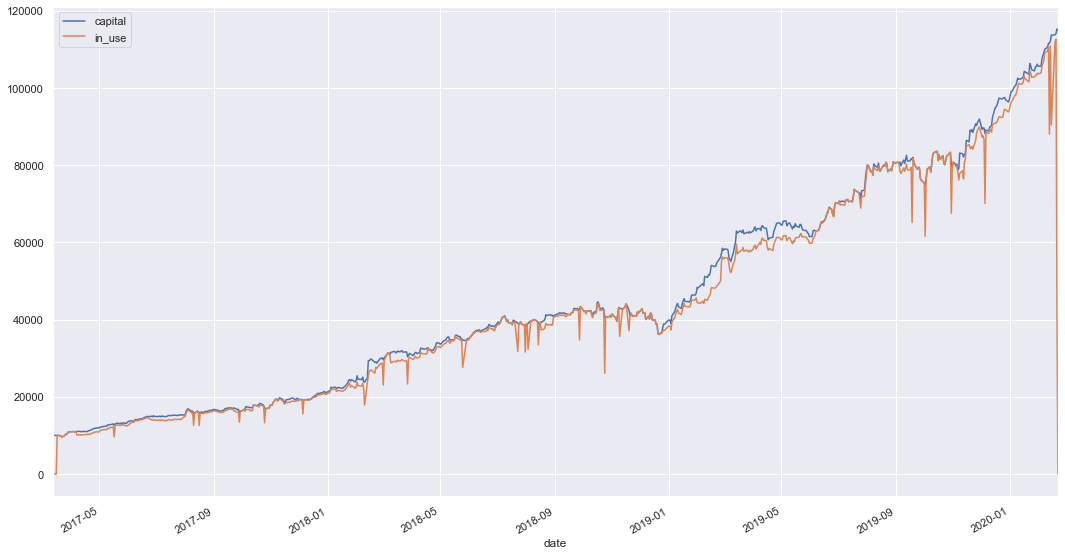

In [5]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols].plot(figsize=(18,10))
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [6]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-17   IONS   SELL   2000.000000   2000.000000    49.726504   
0  2017-03-17   CVGI   SELL   2000.000000   2000.000000   352.112676   
0  2017-03-17   NATR   SELL   2000.000000   2000.000000   200.000000   
0  2017-03-17     MG   SELL   2000.000000   2000.000000    98.087298   
0  2017-03-17    KBR   SELL   2000.000000   2000.000000   147.601476   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-20   LAKE   SELL  22780.739333  24179.722496  1890.517787   
0  2020-02-20    UNP   SELL  22780.739333  22768.324761   124.145718   
0  2020-02-20   FLDM   SELL  22780.739333  22599.939815  6026.650617   
0  2020-02-21    TGT   SELL  20789.855501  21453.576084   183.348227   
0  2020-02-21   HFWA   SELL  23028.010479  22967.952330   857.973565   

    stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0      36.198  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0       5.112  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0       9.000  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      18.351  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      12.195  2.273737e-13  1.136868e-14         0  2.273737e-13      0.00  
..        ...           ...           ...       ...           ...       ...  
0      10.845  1.398983e+03  6.141079e+00         0  1.398983e+03      6.14  
0     165.150 -1.241457e+01 -5.449591e-02         0 -1.241457e+01     -0.05  
0       3.402 -1.807995e+02 -7.936508e-01         0 -1.807995e+02     -0.79  
0     102.051 -2.291853e+02 -1.056993e+00         0  6.637206e+02      3.19  
0      24.156 -6.005815e+01 -2.608048e-01         0 -6.005815e+01     -0.26  

[555 rows x 12 columns]

In [7]:
sell_df.describe()

orig_amount  close_amount     no_shares    stop_loss   daily_gain  \
count    555.000000    555.000000    555.000000   555.000000   555.000000   
mean    9005.678831   9194.886619   1177.832362    52.571460     8.054203   
std     5985.399169   6108.253543   3213.561743   213.259581   368.683007   
min     1721.602401   1721.602401      1.808217     0.198000 -4256.470715   
25%     3443.796801   3623.837785    104.719068     6.480000   -30.962526   
50%     7096.229016   7252.992401    284.582686    22.500000     0.000000   
75%    12883.577059  13153.735527    984.348938    52.290000    33.335948   
max    23028.010479  24179.722496  48849.969121  3699.099000  3967.723138   

       daily_return  invested         gain    gain_pct  
count    555.000000     555.0   555.000000  555.000000  
mean       0.060761       0.0   189.207787    2.511261  
std        4.896399       0.0   818.170427   10.580893  
min      -32.651549       0.0 -3436.267621  -35.180000  
25%       -0.545285       0.0     0.000000    0.000000  
50%        0.000000       0.0     0.000000    0.000000  
75%        0.593428       0.0   189.220336    2.560000  
max       86.956522       0.0  6798.589945   99.480000

In [8]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2017-09-28   DXCM   SELL   2733.190192   1771.699890    38.989874   
0 2018-03-27    UNT   SELL   5870.940817   4741.147553   284.582686   
0 2019-12-05   VNRX   SELL  18143.493038  14707.225417  3436.267621   
0 2018-11-19    RPD   SELL   6506.830494   5328.787769   190.313849   
0 2019-10-30   ENPH   SELL  14735.464715  12418.567747   661.970562   
0 2018-10-24   EVFM   SELL   7800.523245   6691.819434  1979.828235   
0 2018-07-31   VNRX   SELL   7649.499026   6578.569162  3824.749513   
0 2018-08-14   ENPH   SELL   6661.294645   5730.756041  1134.803176   
0 2019-10-02   REKR   SELL  15216.110976  13231.400848  6615.700424   
0 2018-05-14   INSG   SELL   7084.898858   6181.921553  3472.989636   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0     63.090  -858.946932    -32.651549         0  -961.490301    -35.18  
0     18.567  -774.064907    -14.035088         0 -1129.793264    -19.24  
0      4.752 -2267.936630    -13.360324         0 -3436.267621    -18.94  
0     30.771  -909.700198    -14.582062         0 -1178.042725    -18.10  
0     20.034 -4256.470715    -25.526002         0 -2316.896968    -15.72  
0      3.546  -514.755341     -7.142857         0 -1108.703812    -14.21  
0      1.800  -382.474951     -5.494505         0 -1070.929864    -14.00  
0      5.283  -363.137016     -5.959032         0  -930.538605    -13.97  
0      2.070  -793.884051     -5.660377         0 -1984.710127    -13.04  
0      1.836  -243.109275     -3.783784         0  -902.977305    -12.75

In [9]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2018-03-09   ENPH   SELL   4456.557748   8890.143549  2297.194716   
0 2018-02-13     ZN   SELL   4285.140989   8530.604746  1983.861569   
0 2019-03-15   KALV   SELL   8973.437263  14313.003238   494.404257   
0 2019-09-05   MEDP   SELL  11606.100702  18404.690647   222.466948   
0 2017-04-07    SYX   SELL   1981.549449   3098.223725   364.926234   
0 2017-06-26   NVDA   SELL   2229.018867   3352.860318    22.219088   
0 2019-06-07   ESNT   SELL   6799.701282  10065.715874   207.497750   
0 2019-01-31   RUBI   SELL   8471.863183  12110.419806  2715.340764   
0 2019-02-04   ENPH   SELL   7324.227601  10274.467576  1467.781082   
0 2018-01-25   VNRX   SELL   3962.357945   5485.204468  1478.491770   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      1.746   183.775577      2.110818         0  4433.585801     99.48  
0      1.944  3967.723138     86.956522         0  4245.463757     99.07  
0     16.335 -1062.969152     -6.913183         0  5339.565975     59.50  
0     46.953   298.105711      1.646394         0  6798.589945     58.58  
0      4.887    29.194099      0.951249         0  1116.674275     56.35  
0     90.288   -36.883685     -1.088096         0  1123.841451     50.42  
0     29.493   -33.199640     -0.328745         0  3266.014592     48.03  
0      2.808   380.147707      3.240741         0  3638.556623     42.95  
0      4.491     0.000000      0.000000         0  2950.239975     40.28  
0      2.412  -354.838025     -6.075949         0  1522.846523     38.43

In [10]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(119, 0.21441441441441442)

In [11]:
myPnL_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-17   CVGI    BUY   2000.000000   2000.000000   352.112676   
0  2017-03-17    CRK    BUY   2000.000000   2000.000000   241.254524   
0  2017-03-17   CHNR    BUY   2000.000000   2000.000000  1010.101010   
0  2017-03-17   NATR    BUY   2000.000000   2000.000000   200.000000   
0  2017-03-17   IONS    BUY   2000.000000   2000.000000    49.726504   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-20   HFWA    BUY  23028.010479  23028.010479   857.973565   
0  2020-02-20    TGT  CLOSE  20789.855501  21682.761368   183.348227   
0  2020-02-20   HFWA  CLOSE  23028.010479  23028.010479   857.973565   
0  2020-02-21    TGT   SELL  20789.855501  21453.576084   183.348227   
0  2020-02-21   HFWA   SELL  23028.010479  22967.952330   857.973565   

    stop_loss  daily_gain  daily_return  invested  
0       5.112    0.000000      0.000000         0  
0       7.461    0.000000      0.000000         0  
0       1.782    0.000000      0.000000         0  
0       9.000    0.000000      0.000000         0  
0      36.198    0.000000      0.000000         0  
..        ...         ...           ...       ...  
0      24.156    0.000000      0.000000         0  
0     102.051  159.512958      0.741119         0  
0      24.156    0.000000      0.000000         0  
0     102.051 -229.185284     -1.056993         0  
0      24.156  -60.058150     -0.260805         0  

[4767 rows x 10 columns]

In [12]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['IONS', 'CVGI', 'NATR', 'MG', 'KBR', 'CRK', 'CCI', 'CBPO', 'CF',
        'CHNR', 'JCS', 'PTSI', 'ISNS', 'TECH', 'EXAS', 'DXCM', 'PKBK',
        'CCMP', 'PODD', 'SYX', 'ISSC', 'SIRI', 'LULU', 'SKYW', 'AIRT',
        'OFLX', 'BIIB', 'ZN', 'ALL', 'AUB', 'MRK', 'GFN', 'TGNA', 'PEBK',
        'PW', 'CRMT', 'DOV', 'ARWR', 'MSEX', 'NSSC', 'CORT', 'TGT', 'TIPT',
        'CVI', 'STRL', 'ATRS', 'GLUU', 'ITT', 'NVDA', 'CPIX', 'RF', 'OSBC',
        'PLPC', 'DSGX', 'ICFI', 'KLIC', 'TDG', 'NSIT', 'VIAV', 'MCRI',
        'ITIC', 'DPZ', 'CTHR', 'TRNS', 'HTZ', 'IMMR', 'NOA', 'AMWD',
        'ARAY', 'UNT', 'RGS', 'HBMD', 'HOFT', 'KMI', 'HON', 'AMP', 'AMGN',
        'PACW', 'RRD', 'EDSA', 'MLP', 'PCRX', 'SPOK', 'TBBK', 'PRAA',
        'BASI', 'FSI', 'XRAY', 'STRT', 'PCTI', 'LNN', 'UI', 'INSG', 'FLNT',
        'BDSI', 'GCO', 'BTE', 'ACB', 'GRPN', 'HURN', 'PEBO', 'SMP', 'JJSF',
        'VNRX', 'AVAV', 'COOP', 'ADP', 'ENV', 'AVY', 'SANM', 'MTEM',
        'CRAI', 'NSYS', 'CHEF', 'JBLU', 'IIVI', 'MBI'

In [13]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
163   MEDP  6798.589945
81    ESNT  6089.588784
178    NOA  5824.484699
226   RUBI  5638.504556
5     AIRT  5477.925696
228   SALT  5178.324602
55    COUP  4713.843323
86    EXAS  4388.286403
186   NXRT  4295.286223
79    ENPH  4136.390204

In [14]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
224    RPD -2813.794453
217   REKR -1984.710127
4     AGRX -1520.018198
274   VNRX -1406.290232
95    FIVN -1089.484887
150    KOD  -896.797595
133    IQV  -788.345870
34    BPRN  -722.302896
78    EDSA  -568.394435
129   INSG  -506.569041

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
163   MEDP  6798.589945
55    COUP  4713.843323
186   NXRT  4295.286223
108   GWRS  3080.566934
81    ESNT  3044.794392
226   RUBI  2819.252278
177   NEWR  1895.074667
145   KALV  1862.344372
89    FCBP  1680.487424
243    SSY  1608.273768

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
217   REKR -1984.710127
224    RPD -1406.897227
150    KOD  -896.797595
4     AGRX  -760.009099
34    BPRN  -722.302896
7     ALPN  -489.976481
229   SANM  -429.317376
95    FIVN  -363.161629
169   MSBI  -315.214774
133    IQV  -262.781957

# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

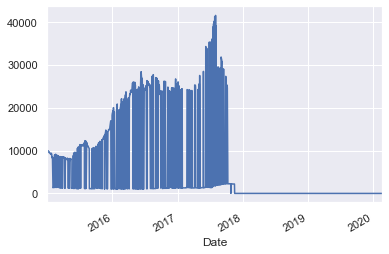

In [17]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

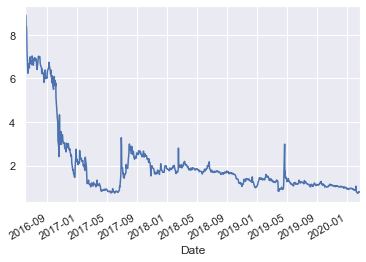

In [18]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [19]:
myCapital_df.tail()

date capital   in_use     free
date                                           
2020-02-14 2020-02-14  113666  90425.3  23240.7
2020-02-18 2020-02-18  113777   111999  1777.74
2020-02-19 2020-02-19  114065   112584  1480.88
2020-02-20 2020-02-20  115300  44710.8  70588.8
2020-02-21 2020-02-21  115010        0   115010